In [53]:
# import liabaries
#!pip install rioxarray -q
import rioxarray as rxr
import geopandas as gpd
from shapely.geometry import Polygon
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [54]:
from concurrent.futures import ProcessPoolExecutor
import os

def worker(num):
    """Thread worker function"""
    print(f'Worker: {num}',flush=True)
    return num * num

if __name__ == '__main__':
    # Get the number of CPUs available
    num_workers = os.cpu_count()
    print(f'Number of workers: {num_workers}')
    
    with ProcessPoolExecutor(max_workers=num_workers) as executor:
        results = list(executor.map(worker, range(31)))
    print(results)

Number of workers: 64


Worker: 0Worker: 1Worker: 6
Worker: 7Worker: 13Worker: 11Worker: 10Worker: 3Worker: 9Worker: 2Worker: 5
Worker: 12
Worker: 8Worker: 4Worker: 14Worker: 15Worker: 27Worker: 22Worker: 17Worker: 20Worker: 16Worker: 28Worker: 29
Worker: 24Worker: 23Worker: 21
Worker: 26Worker: 25Worker: 30























Worker: 18
Worker: 19
[0, 1, 4, 9, 16, 25, 36, 49, 64, 81, 100, 121, 144, 169, 196, 225, 256, 289, 324, 361, 400, 441, 484, 529, 576, 625, 676, 729, 784, 841, 900]


In [55]:
# connect to google drive
#from google.colab import drive
#drive.mount('/content/drive')

## Step 1
### Import the 1km grids (.gpkg) file from drive   
The original grid file from QGIS, the grid contains the geometry and crs

In [56]:
# read 1km grid file from local  
# grid_1km = gpd.read_file('/content/drive/MyDrive/birds/birds/project1/1km_hexagon.gpkg')

# grid_1km = gpd.read_file('/home/ztang/canterbury_birds/GIS_file/statsnz-new-zealand-grid-1-kilometre-2023-SHP.zip')

# alternative way to read 1km hexagon file from local
region = gpd.read_file('/home/ztang/canterbury_birds/GIS_file/statsnz-regional-council-2023-clipped-generalised-SHP.zip')
region



REGC2023_V                 REGC2023_1                 REGC2023_2  \
0          01           Northland Region           Northland Region   
1          02            Auckland Region            Auckland Region   
2          03             Waikato Region             Waikato Region   
3          04       Bay of Plenty Region       Bay of Plenty Region   
4          05            Gisborne Region            Gisborne Region   
5          06         Hawke's Bay Region         Hawke's Bay Region   
6          07            Taranaki Region            Taranaki Region   
7          08  Manawatū-Whanganui Region  Manawatu-Whanganui Region   
8          09          Wellington Region          Wellington Region   
9          12          West Coast Region          West Coast Region   
10         13          Canterbury Region          Canterbury Region   
11         14               Otago Region               Otago Region   
12         15           Southland Region           Southland Region   
13         16              Tasman Region              Tasman Region   
14         17              Nelson Region              Nelson Region   
15         18         Marlborough Region         Marlborough Region   
16         99        Area Outside Region        Area Outside Region   

      LAND_AREA_    AREA_SQ_KM    Shape_Leng  \
0   12507.139052  12519.486872  3.315596e+06   
1    4941.164248   4942.230520  2.894126e+06   
2   23900.953428  24579.407274  2.193387e+06   
3   12071.549623  12281.370005  1.422856e+06   
4    8385.064982   8385.064982  6.957039e+05   
5   14139.051332  14190.848633  9.534995e+05   
6    7254.501680   7254.501680  5.344678e+05   
7   22220.638989  22220.638989  1.118034e+06   
8    8049.474240   8119.562231  6.795740e+05   
9   23245.518393  23321.164320  1.726195e+06   
10  44503.596192  45207.475814  1.860630e+06   
11  31186.161571  31904.517921  1.510483e+06   
12  31218.954918  31870.256296  4.123257e+06   
13   9615.576062   9649.086216  1.065444e+06   
14    422.193850    422.193850  1.742688e+05   
15  10457.888026  10470.679707  2.308649e+06   
16    798.842436    813.232988  4.903310e+05   

                                             geometry  
0   MULTIPOLYGON (((1714357.617 5983211.997, 17143...  
1   MULTIPOLYGON (((1758426.203 5908461.836, 17584...  
2   MULTIPOLYGON (((1763422.191 5781168.753, 17634...  
3   MULTIPOLYGON (((1962972.136 5784007.406, 19629...  
4   MULTIPOLYGON (((2039162.01 5703724.401, 203919...  
5   MULTIPOLYGON (((1941251.295 5580353.81, 194124...  
6   MULTIPOLYGON (((1687622.432 5675977.675, 16876...  
7   POLYGON ((1821624.069 5738734.422, 1823326.936...  
8   MULTIPOLYGON (((1748467.58 5420994.674, 174845...  
9   MULTIPOLYGON (((1268984.122 5135203.798, 12689...  
10  MULTIPOLYGON (((1586267.292 5166799.259, 15862...  
11  MULTIPOLYGON (((1345472.787 4846882.414, 13454...  
12  MULTIPOLYGON (((1184140.367 4748116.751, 11841...  
13  MULTIPOLYGON (((1612468.617 5428503.732, 16124...  
14  MULTIPOLYGON (((1616853.294 5426737.472, 16168...  
15  MULTIPOLYGON (((1689102.358 5399637.218, 16890...  
16  MULTIPOLYGON (((1511253.021 6216365.179, 15112...

In [57]:
# filter the region of canterbury region
canterbury_region = region[region['REGC2023_1'] == 'Canterbury Region']

In [58]:
canterbury_region

REGC2023_V         REGC2023_1         REGC2023_2    LAND_AREA_  \
10         13  Canterbury Region  Canterbury Region  44503.596192   

      AREA_SQ_KM    Shape_Leng  \
10  45207.475814  1.860630e+06   

                                             geometry  
10  MULTIPOLYGON (((1586267.292 5166799.259, 15862...

In [59]:
canterbury_region.crs

<Projected CRS: EPSG:2193>
Name: NZGD2000 / New Zealand Transverse Mercator 2000
Axis Info [cartesian]:
- N[north]: Northing (metre)
- E[east]: Easting (metre)
Area of Use:
- name: New Zealand - North Island, South Island, Stewart Island - onshore.
- bounds: (166.37, -47.33, 178.63, -34.1)
Coordinate Operation:
- name: New Zealand Transverse Mercator 2000
- method: Transverse Mercator
Datum: New Zealand Geodetic Datum 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [121]:
# export the canterbury region to a shapefile
#canterbury_region.to_file('/home/ztang/canterbury_birds/GIS_file/canterbury_region.shp')

In [60]:
# read 1km grid file from local
#grid_1km = gpd.read_file('/home/ztang/canterbury_birds/GIS_file/statsnz-new-zealand-grid-1-kilometre-2023-SHP.zip')

In [61]:
# plot the grid
#grid_1km = grid_1km.to_crs(epsg=2193)


In [62]:
# clip the grid with canterbury region
#grid_1km_canterbury = gpd.clip(grid_1km, canterbury_region)

In [63]:
# export the grid_1km_canterbury to project folder
#grid_1km_canterbury.to_file('/home/ztang/canterbury_birds/GIS_file/grid_1km_canterbury.shp')

In [64]:
# read the grid_1km_canterbury file
grid_1km_canterbury = gpd.read_file('/home/ztang/canterbury_birds/GIS_file/grid_1km_canterbury.shp')

In [65]:
grid_1km_canterbury.head()

CENTROID_X  CENTROID_Y        GridID  Shape_Leng  \
0   1395500.0   5004500.0  E13955N50045      4000.0   
1   1397500.0   5005500.0  E13975N50055      4000.0   
2   1398500.0   5005500.0  E13985N50055      4000.0   
3   1396500.0   5005500.0  E13965N50055      4000.0   
4   1399500.0   5006500.0  E13995N50065      4000.0   

                                            geometry  
0  POLYGON ((1395000 5005000, 1395673.839 5005000...  
1  POLYGON ((1397000 5006000, 1398000 5006000, 13...  
2  POLYGON ((1398000 5006000, 1398315.176 5006000...  
3  POLYGON ((1396000 5006000, 1397000 5006000, 13...  
4  POLYGON ((1399000 5007000, 1399248.641 5007000...

view grids

In [66]:
grid_1km_canterbury.crs

<Projected CRS: EPSG:2193>
Name: NZGD2000 / New Zealand Transverse Mercator 2000
Axis Info [cartesian]:
- N[north]: Northing (metre)
- E[east]: Easting (metre)
Area of Use:
- name: New Zealand - North Island, South Island, Stewart Island - onshore.
- bounds: (166.37, -47.33, 178.63, -34.1)
Coordinate Operation:
- name: New Zealand Transverse Mercator 2000
- method: Transverse Mercator
Datum: New Zealand Geodetic Datum 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [67]:
# set grid_1km crs to epsg:2193
# grid_1km_canterbury.crs = "EPSG:2193"

In [68]:
grid_1km_canterbury.head()

CENTROID_X  CENTROID_Y        GridID  Shape_Leng  \
0   1395500.0   5004500.0  E13955N50045      4000.0   
1   1397500.0   5005500.0  E13975N50055      4000.0   
2   1398500.0   5005500.0  E13985N50055      4000.0   
3   1396500.0   5005500.0  E13965N50055      4000.0   
4   1399500.0   5006500.0  E13995N50065      4000.0   

                                            geometry  
0  POLYGON ((1395000 5005000, 1395673.839 5005000...  
1  POLYGON ((1397000 5006000, 1398000 5006000, 13...  
2  POLYGON ((1398000 5006000, 1398315.176 5006000...  
3  POLYGON ((1396000 5006000, 1397000 5006000, 13...  
4  POLYGON ((1399000 5007000, 1399248.641 5007000...

### Step 2
Import the cbirds_filtered.csv, the df has been modified. the original data is ebrids distirbution dataset 2023 from ebirds

In [69]:
# read shapely file
# canterbury bird`s` distribution
import geopandas as gpd
cbirds = pd.read_csv('/home/ztang/canterbury_birds/GIS_file/cbirds_filtered.csv')

In [70]:
cbirds.head()

LAST EDITED DATE  TAXONOMIC ORDER CATEGORY          COMMON NAME  \
0       2023/01/11           6851.0     spuh        albatross sp.   
1       2023/01/11           6851.0     spuh        albatross sp.   
2       2023/12/11           7167.0  species  Australasian Gannet   
3       2023/01/18           7167.0  species  Australasian Gannet   
4       2023/10/17           7167.0  species  Australasian Gannet   

   SCIENTIFIC NAME EXOTIC CODE OBSERVATION COUNT BREEDING CODE  \
0  Diomedeidae sp.         NaN                 1           NaN   
1  Diomedeidae sp.         NaN                 4           NaN   
2   Morus serrator         NaN                 1           NaN   
3   Morus serrator         NaN                 1           NaN   
4   Morus serrator         NaN                 2           NaN   

  BREEDING CATEGORY BEHAVIOR CODE  ... ATLAS BLOCK  \
0               NaN           NaN  ...         NaN   
1               NaN           NaN  ...     blkCI59   
2               NaN           NaN  ...     blkCL57   
3               NaN           NaN  ...     blkCL56   
4               NaN           NaN  ...         NaN   

                                            LOCALITY LOCALITY ID  \
0  Hikurangi Marine Reserve, Kaikōura NZ-Canterbu...   L22166918   
1  North of Clarence River Mouth, Kaikōura NZ-Can...   L22168688   
2                          Kaikoura--town waterfront    L1249759   
3  1200 Alpine Pacific Touring Route, Peketā, Can...   L22249885   
4             Kaikoura South Coast--Oaro River Mouth   L12602431   

  LOCALITY TYPE   LATITUDE   LONGITUDE OBSERVATION DATE  \
0             P -42.458124  173.554744       2023/01/12   
1             P -42.171416  173.932336       2023/01/12   
2             H -42.402038  173.682518       2023/01/21   
3             P -42.451887  173.568536       2023/01/18   
4             H -42.513964  173.507146       2023/01/15   

  TIME OBSERVATIONS STARTED  APPROVED  Migration_type  
0                  11:41:00       1.0               N  
1                  13:16:00       1.0               N  
2                  11:59:00       1.0               N  
3                  11:02:00       1.0               N  
4                  12:05:00       1.0               N  

[5 rows x 24 columns]

In [71]:
cbirds.columns

Index(['LAST EDITED DATE', 'TAXONOMIC ORDER', 'CATEGORY', 'COMMON NAME',
       'SCIENTIFIC NAME', 'EXOTIC CODE', 'OBSERVATION COUNT', 'BREEDING CODE',
       'BREEDING CATEGORY', 'BEHAVIOR CODE', 'STATE CODE', 'COUNTY',
       'COUNTY CODE', 'IBA CODE', 'ATLAS BLOCK', 'LOCALITY', 'LOCALITY ID',
       'LOCALITY TYPE', 'LATITUDE', 'LONGITUDE', 'OBSERVATION DATE',
       'TIME OBSERVATIONS STARTED', 'APPROVED', 'Migration_type'],
      dtype='object')

In [72]:
cbirds.dtypes

LAST EDITED DATE              object
TAXONOMIC ORDER              float64
CATEGORY                      object
COMMON NAME                   object
SCIENTIFIC NAME               object
EXOTIC CODE                   object
OBSERVATION COUNT             object
BREEDING CODE                 object
BREEDING CATEGORY             object
BEHAVIOR CODE                 object
STATE CODE                    object
COUNTY                        object
COUNTY CODE                   object
IBA CODE                      object
ATLAS BLOCK                   object
LOCALITY                      object
LOCALITY ID                   object
LOCALITY TYPE                 object
LATITUDE                     float64
LONGITUDE                    float64
OBSERVATION DATE              object
TIME OBSERVATIONS STARTED     object
APPROVED                     float64
Migration_type                object
dtype: object

In [73]:
# convert the columns to lower case and replace space with underscore
cbirds.columns = cbirds.columns.str.lower().str.replace(' ', '_')
cbirds.head()

last_edited_date  taxonomic_order category          common_name  \
0       2023/01/11           6851.0     spuh        albatross sp.   
1       2023/01/11           6851.0     spuh        albatross sp.   
2       2023/12/11           7167.0  species  Australasian Gannet   
3       2023/01/18           7167.0  species  Australasian Gannet   
4       2023/10/17           7167.0  species  Australasian Gannet   

   scientific_name exotic_code observation_count breeding_code  \
0  Diomedeidae sp.         NaN                 1           NaN   
1  Diomedeidae sp.         NaN                 4           NaN   
2   Morus serrator         NaN                 1           NaN   
3   Morus serrator         NaN                 1           NaN   
4   Morus serrator         NaN                 2           NaN   

  breeding_category behavior_code  ... atlas_block  \
0               NaN           NaN  ...         NaN   
1               NaN           NaN  ...     blkCI59   
2               NaN           NaN  ...     blkCL57   
3               NaN           NaN  ...     blkCL56   
4               NaN           NaN  ...         NaN   

                                            locality locality_id  \
0  Hikurangi Marine Reserve, Kaikōura NZ-Canterbu...   L22166918   
1  North of Clarence River Mouth, Kaikōura NZ-Can...   L22168688   
2                          Kaikoura--town waterfront    L1249759   
3  1200 Alpine Pacific Touring Route, Peketā, Can...   L22249885   
4             Kaikoura South Coast--Oaro River Mouth   L12602431   

  locality_type   latitude   longitude observation_date  \
0             P -42.458124  173.554744       2023/01/12   
1             P -42.171416  173.932336       2023/01/12   
2             H -42.402038  173.682518       2023/01/21   
3             P -42.451887  173.568536       2023/01/18   
4             H -42.513964  173.507146       2023/01/15   

  time_observations_started  approved  migration_type  
0                  11:41:00       1.0               N  
1                  13:16:00       1.0               N  
2                  11:59:00       1.0               N  
3                  11:02:00       1.0               N  
4                  12:05:00       1.0               N  

[5 rows x 24 columns]

In [74]:
# convert the Latitude and Longitude to float
cbirds['latitude'] = cbirds['latitude'].astype(float)
cbirds['longitude'] = cbirds['longitude'].astype(float)

In [75]:
#cbirds.dtypes

In [76]:
# read the geometrey cols and set the crs
cbirds_gdf = gpd.GeoDataFrame(cbirds, geometry=gpd.points_from_xy(cbirds.longitude,cbirds.latitude),crs="EPSG:4326")

In [77]:
cbirds_gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [78]:
#cbirds_gdf.columns

In [79]:
#cbirds_gdf.head()

In [80]:
cbirds_gdf.to_crs(epsg=2193, inplace=True)

In [81]:
cbirds_gdf.head()

last_edited_date  taxonomic_order category          common_name  \
0       2023/01/11           6851.0     spuh        albatross sp.   
1       2023/01/11           6851.0     spuh        albatross sp.   
2       2023/12/11           7167.0  species  Australasian Gannet   
3       2023/01/18           7167.0  species  Australasian Gannet   
4       2023/10/17           7167.0  species  Australasian Gannet   

   scientific_name exotic_code observation_count breeding_code  \
0  Diomedeidae sp.         NaN                 1           NaN   
1  Diomedeidae sp.         NaN                 4           NaN   
2   Morus serrator         NaN                 1           NaN   
3   Morus serrator         NaN                 1           NaN   
4   Morus serrator         NaN                 2           NaN   

  breeding_category behavior_code  ...  \
0               NaN           NaN  ...   
1               NaN           NaN  ...   
2               NaN           NaN  ...   
3               NaN           NaN  ...   
4               NaN           NaN  ...   

                                            locality locality_id  \
0  Hikurangi Marine Reserve, Kaikōura NZ-Canterbu...   L22166918   
1  North of Clarence River Mouth, Kaikōura NZ-Can...   L22168688   
2                          Kaikoura--town waterfront    L1249759   
3  1200 Alpine Pacific Touring Route, Peketā, Can...   L22249885   
4             Kaikoura South Coast--Oaro River Mouth   L12602431   

  locality_type   latitude   longitude observation_date  \
0             P -42.458124  173.554744       2023/01/12   
1             P -42.171416  173.932336       2023/01/12   
2             H -42.402038  173.682518       2023/01/21   
3             P -42.451887  173.568536       2023/01/18   
4             H -42.513964  173.507146       2023/01/15   

  time_observations_started approved  migration_type  \
0                  11:41:00      1.0               N   
1                  13:16:00      1.0               N   
2                  11:59:00      1.0               N   
3                  11:02:00      1.0               N   
4                  12:05:00      1.0               N   

                          geometry  
0  POINT (1645611.636 5299207.695)  
1  POINT (1677006.617 5330770.721)  
2  POINT (1656167.445 5305358.826)  
3  POINT (1646750.255 5299892.769)  
4  POINT (1641660.959 5293031.744)  

[5 rows x 25 columns]

### STEP 3
Reset the cols type

In [82]:
# convert migration_type into categorical type
cbirds_gdf['migration_type'] = cbirds_gdf['migration_type'].astype('category')

#### Reset oberservation col to int
ps: there is 'X' contain the oberservation count, regarding to the ebird data description, X means unable to identify the number of birds BUT INDICATE PRESENCE. therefore, we can set the X into 1 

In [83]:
# set x into 1 and convert oberservation col to int type
cbirds_gdf.loc[cbirds_gdf['observation_count'] == 'X', 'observation_count'] = 1
cbirds_gdf['observation_count'] = cbirds_gdf['observation_count'].astype('int64')

In [84]:
# list the number of birds in each migration type
cbirds_gdf.groupby('migration_type')['observation_count'].sum()

/tmp/ipykernel_2869759/2436635041.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cbirds_gdf.groupby('migration_type')['observation_count'].sum()


migration_type
M     13880
N    856406
Name: observation_count, dtype: int64

In [85]:
cbirds_gdf.columns

Index(['last_edited_date', 'taxonomic_order', 'category', 'common_name',
       'scientific_name', 'exotic_code', 'observation_count', 'breeding_code',
       'breeding_category', 'behavior_code', 'state_code', 'county',
       'county_code', 'iba_code', 'atlas_block', 'locality', 'locality_id',
       'locality_type', 'latitude', 'longitude', 'observation_date',
       'time_observations_started', 'approved', 'migration_type', 'geometry'],
      dtype='object')

In [86]:
# select useful columns from cbirds_gdf
cbirds_gdf_new = cbirds_gdf[['last_edited_date','common_name','locality','migration_type','observation_count','geometry']]

cbirds_gdf_new.head()

last_edited_date          common_name  \
0       2023/01/11        albatross sp.   
1       2023/01/11        albatross sp.   
2       2023/12/11  Australasian Gannet   
3       2023/01/18  Australasian Gannet   
4       2023/10/17  Australasian Gannet   

                                            locality migration_type  \
0  Hikurangi Marine Reserve, Kaikōura NZ-Canterbu...              N   
1  North of Clarence River Mouth, Kaikōura NZ-Can...              N   
2                          Kaikoura--town waterfront              N   
3  1200 Alpine Pacific Touring Route, Peketā, Can...              N   
4             Kaikoura South Coast--Oaro River Mouth              N   

   observation_count                         geometry  
0                  1  POINT (1645611.636 5299207.695)  
1                  4  POINT (1677006.617 5330770.721)  
2                  1  POINT (1656167.445 5305358.826)  
3                  1  POINT (1646750.255 5299892.769)  
4                  2  POINT (1641660.959 5293031.744)

In [87]:
cbirds_gdf_new.dtypes

last_edited_date       object
common_name            object
locality               object
migration_type       category
observation_count       int64
geometry             geometry
dtype: object

In [88]:
# convert observation_date to time format 
cbirds_gdf_new['last_edited_date'] = pd.to_datetime(cbirds_gdf_new['last_edited_date'])
cbirds_gdf_new.head()

/home/ztang/miniforge3/envs/deepl1/lib/python3.12/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


last_edited_date          common_name  \
0       2023-01-11        albatross sp.   
1       2023-01-11        albatross sp.   
2       2023-12-11  Australasian Gannet   
3       2023-01-18  Australasian Gannet   
4       2023-10-17  Australasian Gannet   

                                            locality migration_type  \
0  Hikurangi Marine Reserve, Kaikōura NZ-Canterbu...              N   
1  North of Clarence River Mouth, Kaikōura NZ-Can...              N   
2                          Kaikoura--town waterfront              N   
3  1200 Alpine Pacific Touring Route, Peketā, Can...              N   
4             Kaikoura South Coast--Oaro River Mouth              N   

   observation_count                         geometry  
0                  1  POINT (1645611.636 5299207.695)  
1                  4  POINT (1677006.617 5330770.721)  
2                  1  POINT (1656167.445 5305358.826)  
3                  1  POINT (1646750.255 5299892.769)  
4                  2  POINT (1641660.959 5293031.744)

#### STEP 4
apply sptial join with grid_1km

In [89]:
grid_1km_canterbury.crs == cbirds_gdf.crs

True

In [90]:
grid_1km_canterbury.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 46248 entries, 0 to 46247
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   CENTROID_X  46248 non-null  float64 
 1   CENTROID_Y  46248 non-null  float64 
 2   GridID      46248 non-null  object  
 3   Shape_Leng  46248 non-null  float64 
 4   geometry    46248 non-null  geometry
dtypes: float64(3), geometry(1), object(1)
memory usage: 1.8+ MB


In [91]:
# grid_1km.geometry = grid_1km.geometry.to_crs(epsg=2193)


In [92]:
# drop the geometry column
#grid_1km_canterbury.drop(columns=['CENTROID_X', 'CENTROID_Y', 'Shape_Leng'], inplace=True)
grid_1km_canterbury.head()

CENTROID_X  CENTROID_Y        GridID  Shape_Leng  \
0   1395500.0   5004500.0  E13955N50045      4000.0   
1   1397500.0   5005500.0  E13975N50055      4000.0   
2   1398500.0   5005500.0  E13985N50055      4000.0   
3   1396500.0   5005500.0  E13965N50055      4000.0   
4   1399500.0   5006500.0  E13995N50065      4000.0   

                                            geometry  
0  POLYGON ((1395000 5005000, 1395673.839 5005000...  
1  POLYGON ((1397000 5006000, 1398000 5006000, 13...  
2  POLYGON ((1398000 5006000, 1398315.176 5006000...  
3  POLYGON ((1396000 5006000, 1397000 5006000, 13...  
4  POLYGON ((1399000 5007000, 1399248.641 5007000...

In [93]:
#cbirds_gdf_new = cbirds_gdf_new.to_crs(2193)
cbirds_gdf_new.head()

last_edited_date          common_name  \
0       2023-01-11        albatross sp.   
1       2023-01-11        albatross sp.   
2       2023-12-11  Australasian Gannet   
3       2023-01-18  Australasian Gannet   
4       2023-10-17  Australasian Gannet   

                                            locality migration_type  \
0  Hikurangi Marine Reserve, Kaikōura NZ-Canterbu...              N   
1  North of Clarence River Mouth, Kaikōura NZ-Can...              N   
2                          Kaikoura--town waterfront              N   
3  1200 Alpine Pacific Touring Route, Peketā, Can...              N   
4             Kaikoura South Coast--Oaro River Mouth              N   

   observation_count                         geometry  
0                  1  POINT (1645611.636 5299207.695)  
1                  4  POINT (1677006.617 5330770.721)  
2                  1  POINT (1656167.445 5305358.826)  
3                  1  POINT (1646750.255 5299892.769)  
4                  2  POINT (1641660.959 5293031.744)

In [94]:
cbirds_gdf_new['month'] = cbirds_gdf_new['last_edited_date'].dt.month

/home/ztang/miniforge3/envs/deepl1/lib/python3.12/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [95]:
cbirds_gdf_new.month.unique()

array([ 1, 12, 10,  3,  9,  2,  7, 11,  5,  8,  4,  6], dtype=int32)

In [96]:
print(cbirds_gdf_new.geometry.crs)
print(grid_1km_canterbury.geometry.crs)

EPSG:2193
EPSG:2193


In [97]:
# join the cbirds_gdf with grid_1km
cbirds_grid = gpd.sjoin(grid_1km_canterbury, cbirds_gdf_new,predicate='contains')
cbirds_grid.head()


CENTROID_X  CENTROID_Y        GridID  Shape_Leng  \
242   1382500.0   5022500.0  E13825N50225      4000.0   
693   1378500.0   5027500.0  E13785N50275      4000.0   
693   1378500.0   5027500.0  E13785N50275      4000.0   
693   1378500.0   5027500.0  E13785N50275      4000.0   
693   1378500.0   5027500.0  E13785N50275      4000.0   

                                              geometry  index_right  \
242  POLYGON ((1382000 5023000, 1383000 5023000, 13...        63830   
693  POLYGON ((1378000 5028000, 1379000 5028000, 13...        20725   
693  POLYGON ((1378000 5028000, 1379000 5028000, 13...        20443   
693  POLYGON ((1378000 5028000, 1379000 5028000, 13...        20723   
693  POLYGON ((1378000 5028000, 1379000 5028000, 13...        20713   

    last_edited_date         common_name                      locality  \
242       2024-01-02  New Zealand Falcon  Buster Diggings Mount Buster   
693       2024-07-12        Yellowhammer                         AN151   
693       2024-07-12             Dunnock                         AN151   
693       2024-07-12        Yellowhammer                         AN151   
693       2024-07-12        Yellowhammer                         AN151   

    migration_type  observation_count  month  
242              N                  1      1  
693              N                  1      7  
693              N                  1      7  
693              N                  1      7  
693              N                  1      7

In [98]:
# plot the histogram of the number of birds in month
#cbirds_grid['observation_date'] = pd.to_datetime(cbirds_grid['observation_date'])
#cbirds_grid['month'] = cbirds_grid['observation_date'].dt.month
#cbirds_grid['year'] = cbirds_grid['observation_date'].dt.year   
#cbirds_grid['month_year'] = cbirds_grid['observation_date'].dt.to_period('M')
cbirds_grid.head()


CENTROID_X  CENTROID_Y        GridID  Shape_Leng  \
242   1382500.0   5022500.0  E13825N50225      4000.0   
693   1378500.0   5027500.0  E13785N50275      4000.0   
693   1378500.0   5027500.0  E13785N50275      4000.0   
693   1378500.0   5027500.0  E13785N50275      4000.0   
693   1378500.0   5027500.0  E13785N50275      4000.0   

                                              geometry  index_right  \
242  POLYGON ((1382000 5023000, 1383000 5023000, 13...        63830   
693  POLYGON ((1378000 5028000, 1379000 5028000, 13...        20725   
693  POLYGON ((1378000 5028000, 1379000 5028000, 13...        20443   
693  POLYGON ((1378000 5028000, 1379000 5028000, 13...        20723   
693  POLYGON ((1378000 5028000, 1379000 5028000, 13...        20713   

    last_edited_date         common_name                      locality  \
242       2024-01-02  New Zealand Falcon  Buster Diggings Mount Buster   
693       2024-07-12        Yellowhammer                         AN151   
693       2024-07-12             Dunnock                         AN151   
693       2024-07-12        Yellowhammer                         AN151   
693       2024-07-12        Yellowhammer                         AN151   

    migration_type  observation_count  month  
242              N                  1      1  
693              N                  1      7  
693              N                  1      7  
693              N                  1      7  
693              N                  1      7

In [99]:
cbirds_grid['month'].unique()

array([ 1,  7,  2,  5,  4,  3,  8, 12,  9, 11,  6, 10], dtype=int32)

<Axes: xlabel='month'>

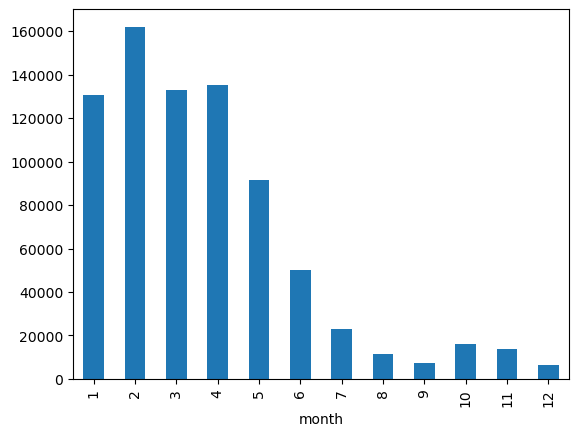

In [100]:
cbirds_grid.groupby('month')['observation_count'].sum().plot(kind='bar')

In [101]:
# sjoin gdpk and oyster
#oyster_grid = gpd.sjoin(grid, oyster,predicate = 'intersects')

In [102]:
cbirds_grid.head()

CENTROID_X  CENTROID_Y        GridID  Shape_Leng  \
242   1382500.0   5022500.0  E13825N50225      4000.0   
693   1378500.0   5027500.0  E13785N50275      4000.0   
693   1378500.0   5027500.0  E13785N50275      4000.0   
693   1378500.0   5027500.0  E13785N50275      4000.0   
693   1378500.0   5027500.0  E13785N50275      4000.0   

                                              geometry  index_right  \
242  POLYGON ((1382000 5023000, 1383000 5023000, 13...        63830   
693  POLYGON ((1378000 5028000, 1379000 5028000, 13...        20725   
693  POLYGON ((1378000 5028000, 1379000 5028000, 13...        20443   
693  POLYGON ((1378000 5028000, 1379000 5028000, 13...        20723   
693  POLYGON ((1378000 5028000, 1379000 5028000, 13...        20713   

    last_edited_date         common_name                      locality  \
242       2024-01-02  New Zealand Falcon  Buster Diggings Mount Buster   
693       2024-07-12        Yellowhammer                         AN151   
693       2024-07-12             Dunnock                         AN151   
693       2024-07-12        Yellowhammer                         AN151   
693       2024-07-12        Yellowhammer                         AN151   

    migration_type  observation_count  month  
242              N                  1      1  
693              N                  1      7  
693              N                  1      7  
693              N                  1      7  
693              N                  1      7

In [103]:
# Use the .info() method to get the datatypes of each column in the GeoDataFrame
cbirds_grid.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 70579 entries, 242 to 45874
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   CENTROID_X         70579 non-null  float64       
 1   CENTROID_Y         70579 non-null  float64       
 2   GridID             70579 non-null  object        
 3   Shape_Leng         70579 non-null  float64       
 4   geometry           70579 non-null  geometry      
 5   index_right        70579 non-null  int64         
 6   last_edited_date   70579 non-null  datetime64[ns]
 7   common_name        70579 non-null  object        
 8   locality           70579 non-null  object        
 9   migration_type     70579 non-null  category      
 10  observation_count  70579 non-null  int64         
 11  month              70579 non-null  int32         
dtypes: category(1), datetime64[ns](1), float64(3), geometry(1), int32(1), int64(2), object(3)
memory usage: 6.3+ MB

In [104]:
# # set X to nan in observatio col
# import numpy as np
# for index, row in oyster_grid.iterrows():
#     if row['OBSERVATIO'] == 'X':
#         oyster_grid.at[index, 'OBSERVATIO'] = np.nan

In [105]:
cbirds_grid.head()

CENTROID_X  CENTROID_Y        GridID  Shape_Leng  \
242   1382500.0   5022500.0  E13825N50225      4000.0   
693   1378500.0   5027500.0  E13785N50275      4000.0   
693   1378500.0   5027500.0  E13785N50275      4000.0   
693   1378500.0   5027500.0  E13785N50275      4000.0   
693   1378500.0   5027500.0  E13785N50275      4000.0   

                                              geometry  index_right  \
242  POLYGON ((1382000 5023000, 1383000 5023000, 13...        63830   
693  POLYGON ((1378000 5028000, 1379000 5028000, 13...        20725   
693  POLYGON ((1378000 5028000, 1379000 5028000, 13...        20443   
693  POLYGON ((1378000 5028000, 1379000 5028000, 13...        20723   
693  POLYGON ((1378000 5028000, 1379000 5028000, 13...        20713   

    last_edited_date         common_name                      locality  \
242       2024-01-02  New Zealand Falcon  Buster Diggings Mount Buster   
693       2024-07-12        Yellowhammer                         AN151   
693       2024-07-12             Dunnock                         AN151   
693       2024-07-12        Yellowhammer                         AN151   
693       2024-07-12        Yellowhammer                         AN151   

    migration_type  observation_count  month  
242              N                  1      1  
693              N                  1      7  
693              N                  1      7  
693              N                  1      7  
693              N                  1      7

In [106]:
# group by id and geometry sum of observatio
#oyster_grid = oyster_grid.groupby(['id','geometry'])['OBSERVATIO'].sum().reset_index()
# grouped_geo = oyster_grid.groupby(['id','geometry'])['OBSERVATIO'].sum().reset_index()
# grouped_geo

In [107]:
# # plot grid and oyster
# import matplotlib.pyplot as plt
# fig, ax = plt.subplots()

# # Plot the "train" data using blue color onto the specified axis
# oyster.plot(color='blue', ax=ax,label='oyster habitats')

# # Plot the "test" data using green color onto the same axis
# grid.plot(color='orange', ax=ax, label='grid')

# # Add a legend to the plot
# #ax.legend()

# # Display the plot
# plt.show()

In [108]:
#nz_boundary = gpd.read_file('/content/drive/MyDrive/interpolation_test/territorial-authority-2021-generalised.gpkg')

In [109]:
#district_list = ['Kaikoura District', 'Hurunui District', 'Selwyn District', 'Waimakariri District', 'Christchurch City', 'Ashburton District', 'Mackenzie District', 'Timaru District', 'Waimate District', 'Waitaki District'] # changed variable name to district_list

#canterbury_region = nz_boundary[nz_boundary['TA2021_V1_00_NAME'].isin(district_list)]

In [110]:
# Specify the output path for the shapefile
#output_shapefile = '/content/drive/MyDrive/birds/birds/project1/canterbury_region.shp'

# Export the GeoDataFrame to a shapefile
#canterbury_region.to_file(output_shapefile,driver='GeoJSON')

In [111]:
# change crs epsg 3857
#canterbury_region = canterbury_region.to_crs(oyster.crs)
#canterbury_region.to_crs('EPSG:3857')

In [112]:
#canterbury_region.crs

In [113]:
# clep oyster by canterbury_region
#oyster_can = gpd.clip(oyster, canterbury_region)

In [114]:
# Import the necessary library for creating plots

# import matplotlib.pyplot as plt

# # Create a new figure and axis for the plot
# fig, ax = plt.subplots(figsize=(14,12))

# # Plot the data from the "lim" dataset with blue color onto the specified axis
# canterbury_region.plot(color='lightgrey', ax=ax)

# oyster_can.plot(ax=ax, color='red',markersize = 0.6)

# grid.plot(ax=ax, legend=True, alpha = 0.8, facecolor='lightgrey', edgecolor='black')


# # Display the final plot
# plt.show()

In [115]:
# find the boundary of grid
#boundary = grid.geometry.unary_union

#chch_boundary = nz_boundary[nz_boundary['TA2021_V1_00_NAME'] == 'Christchurch City']

In [116]:
# clip the grid by chch_boundary
#grid_chch = gpd.clip(grid, chch_boundary)

In [117]:
#oyster_chch = gpd.clip(oyster, chch_boundary)

In [118]:
cbirds_gdf_new.head()

last_edited_date          common_name  \
0       2023-01-11        albatross sp.   
1       2023-01-11        albatross sp.   
2       2023-12-11  Australasian Gannet   
3       2023-01-18  Australasian Gannet   
4       2023-10-17  Australasian Gannet   

                                            locality migration_type  \
0  Hikurangi Marine Reserve, Kaikōura NZ-Canterbu...              N   
1  North of Clarence River Mouth, Kaikōura NZ-Can...              N   
2                          Kaikoura--town waterfront              N   
3  1200 Alpine Pacific Touring Route, Peketā, Can...              N   
4             Kaikoura South Coast--Oaro River Mouth              N   

   observation_count                         geometry  month  
0                  1  POINT (1645611.636 5299207.695)      1  
1                  4  POINT (1677006.617 5330770.721)      1  
2                  1  POINT (1656167.445 5305358.826)     12  
3                  1  POINT (1646750.255 5299892.769)      1  
4                  2  POINT (1641660.959 5293031.744)     10

#### create buffer of canterbury_region

In [122]:
# Assuming canterbury_region is a GeoDataFrame with a valid geometry column

# Get the bounds of the geometry
bounds = canterbury_region.geometry.bounds

# Extract the left, right, bottom, and top values
left = bounds['minx'].min()
right = bounds['maxx'].max()
bottom = bounds['miny'].min()
top = bounds['maxy'].max()

# Print the results
print(f"Left: {left}")
print(f"Right: {right}")
print(f"Bottom: {bottom}")
print(f"Top: {top}")

Left: 1323813.1678
Right: 1688162.0909000002
Bottom: 5004764.9276
Top: 5360240.0554


In [ ]:
import geopandas as gpd

# Assuming chch_boundary is a GeoDataFrame with a valid geometry column

# Create a buffer of 1000 meters (1 kilometer)
canterbury_buffer = canterbury_region.buffer(1000)

# Get the bounds of the extended geometry
bounds = canterbury_buffer.bounds

# Extract the left, right, bottom, and top values
left = bounds['minx'].min()
right = bounds['maxx'].max()
bottom = bounds['miny'].min()
top = bounds['maxy'].max()

# Print the results
print(f"Left: {left}")
print(f"Right: {right}")
print(f"Bottom: {bottom}")
print(f"Top: {top}")

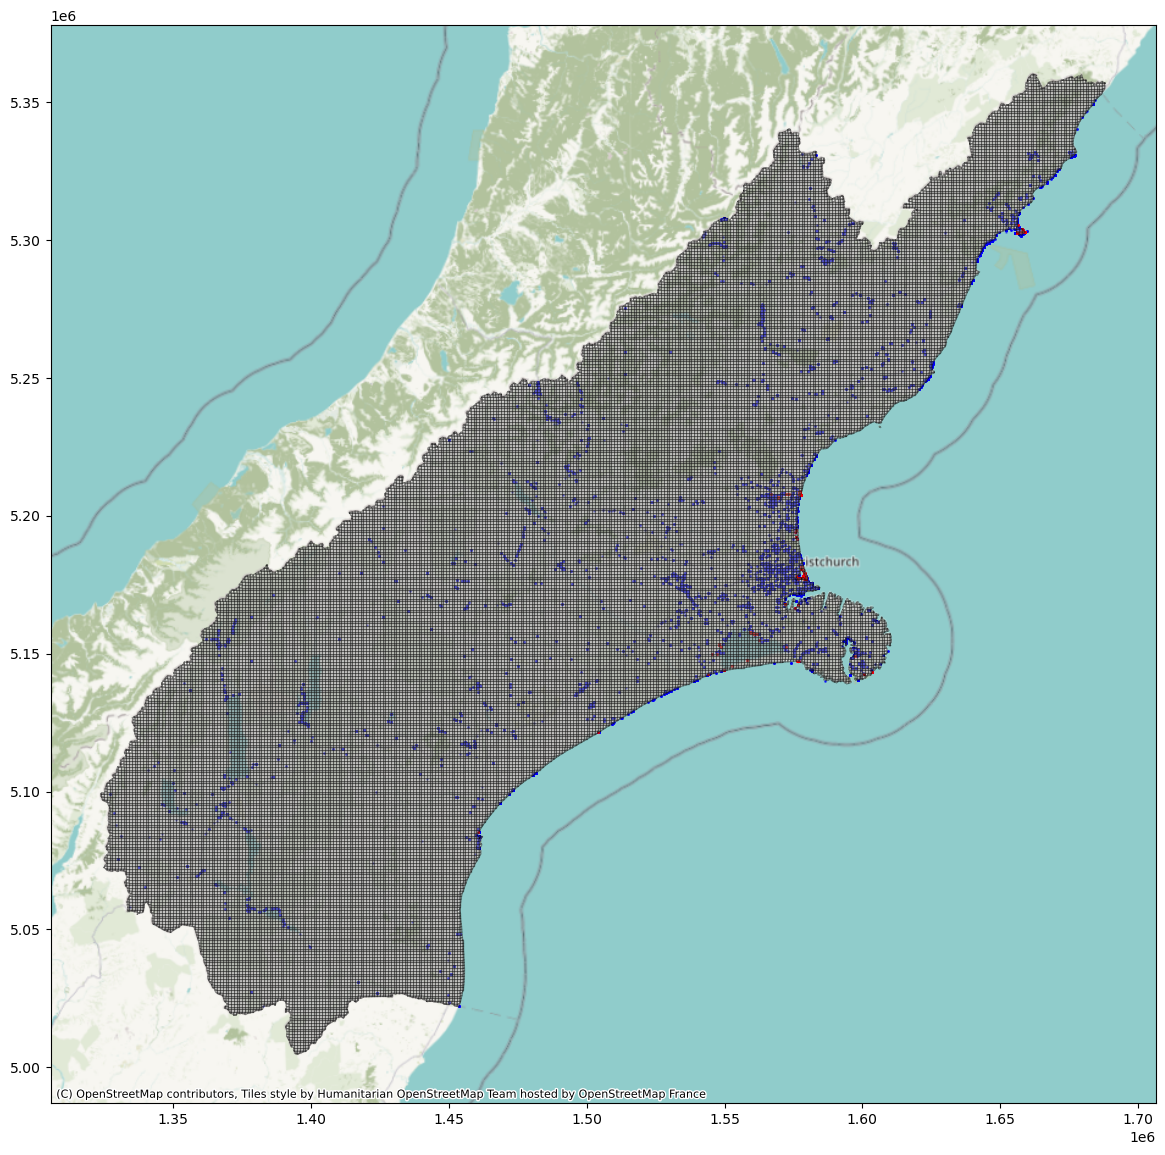

In [124]:
import matplotlib.pyplot as plt
import contextily as ctx

# Create a new figure and axis for the plot
fig, ax = plt.subplots(figsize=(16,14))

# Plot the data from the "lim" dataset with blue color onto the specified axis
#chch_boundary.plot(color='lightgrey', ax=ax)

# plot the colunm of birds_gdf_new data that by migration_type
cbirds_gdf_new[cbirds_gdf_new['migration_type'] == 'N'].plot(ax=ax, color='blue',markersize = 0.6,alpha = 0.5)
cbirds_gdf_new[cbirds_gdf_new['migration_type'] == 'M'].plot(ax=ax, color='red',markersize = 1.4)

#cbirds_gdf_new.plot(ax=ax, color='red',markersize = 0.8)

grid_1km_canterbury.plot(ax=ax, legend=True, alpha = 0.4, facecolor='white', edgecolor='black')

# add base map
ctx.add_basemap(ax, crs=grid_1km_canterbury.crs)

# Display the final plot
plt.show()

In [125]:
# create cbirds_gdf_new data that by month == 2

cbirds_gdf_new_feb = cbirds_gdf_new[cbirds_gdf_new['month'] == 2]

/home/ztang/miniforge3/envs/deepl1/lib/python3.12/site-packages/geopandas/geodataframe.py:1750: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result = super().__getitem__(key)
/home/ztang/miniforge3/envs/deepl1/lib/python3.12/site-packages/geopandas/geodataframe.py:1750: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result = super().__getitem__(key)


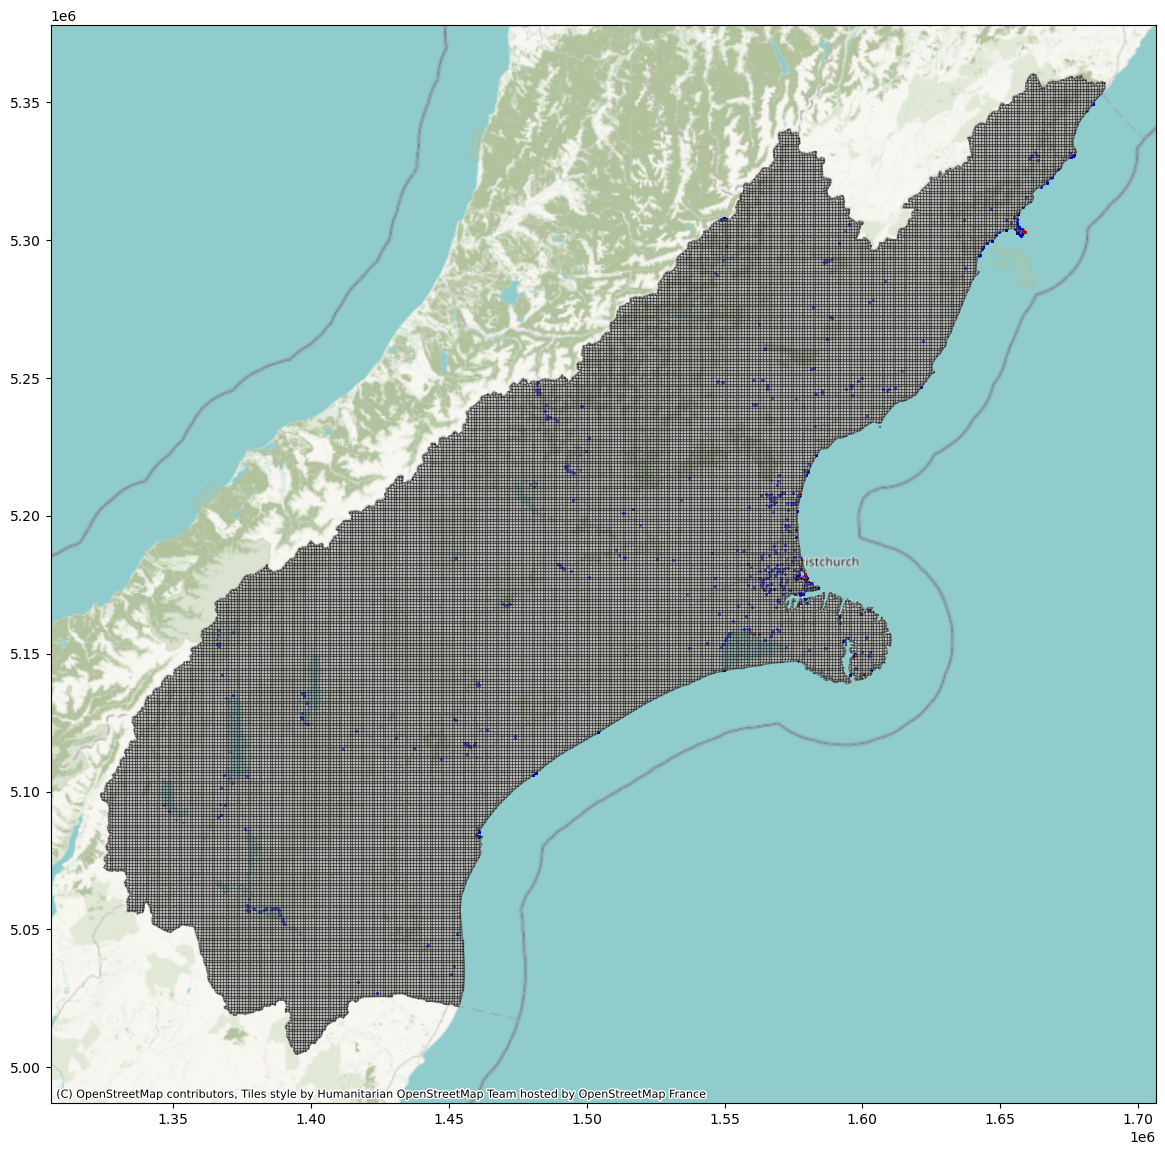

In [126]:
# plot the colunm of birds_gdf_new_feb data that by migration_type
# Create a new figure and axis for the plot
fig, ax = plt.subplots(figsize=(16,14))

# Plot the data from the "lim" dataset with blue color onto the specified axis
#chch_boundary.plot(color='lightgrey', ax=ax)

# plot the colunm of birds_gdf_new data that by migration_type
cbirds_gdf_new_feb[cbirds_gdf_new['migration_type'] == 'N'].plot(ax=ax, color='blue',markersize = 0.6,alpha = 0.5)
cbirds_gdf_new_feb[cbirds_gdf_new['migration_type'] == 'M'].plot(ax=ax, color='red',markersize = 1.4)

#cbirds_gdf_new.plot(ax=ax, color='red',markersize = 0.8)

grid_1km_canterbury.plot(ax=ax, legend=True, alpha = 0.4, facecolor='white', edgecolor='black')

# add base map
ctx.add_basemap(ax, crs=grid_1km_canterbury.crs)

# Display the final plot
plt.show()


In [ ]:
# # Assuming chch_boundary is a GeoDataFrame with a valid geometry column

# # Get the bounds of the geometry
# bounds = chch_boundary.geometry.bounds

# # Extract the left, right, bottom, and top values
# left = bounds['minx'].min()
# right = bounds['maxx'].max()
# bottom = bounds['miny'].min()
# top = bounds['maxy'].max()

# # Print the results
# print(f"Left: {left}")
# print(f"Right: {right}")
# print(f"Bottom: {bottom}")
# print(f"Top: {top}")

Left: 1548690.5755000003
Right: 1610484.9397999998
Bottom: 5139045.7064
Top: 5195841.9311


In [ ]:
# import geopandas as gpd

# # Assuming chch_boundary is a GeoDataFrame with a valid geometry column

# # Create a buffer of 1000 meters (1 kilometer)
# chch_boundary_extended = chch_boundary.buffer(1000)

# # Get the bounds of the extended geometry
# bounds = chch_boundary_extended.bounds

# # Extract the left, right, bottom, and top values
# left = bounds['minx'].min()
# right = bounds['maxx'].max()
# bottom = bounds['miny'].min()
# top = bounds['maxy'].max()

# # Print the results
# print(f"Left: {left}")
# print(f"Right: {right}")
# print(f"Bottom: {bottom}")
# print(f"Top: {top}")

Left: 1547691.40208805
Right: 1611484.6349364968
Bottom: 5138045.9428001065
Top: 5196841.838654296


In [ ]:
#grid_chch = gpd.clip(grid, chch_boundary_extended)

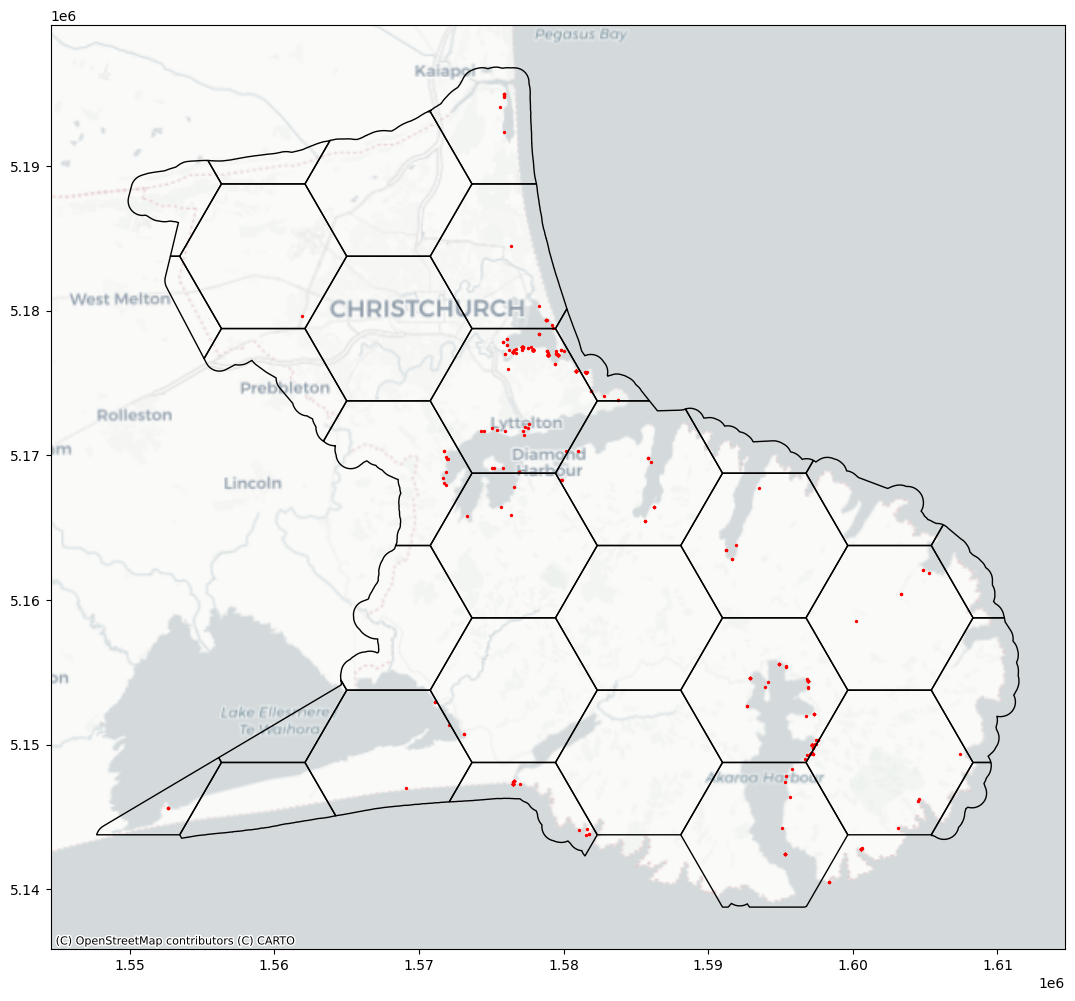

In [ ]:
# import matplotlib.pyplot as plt
# import contextily as cx
# # Create a new figure and axis for the plot
# fig, ax = plt.subplots(figsize=(14,12))


# #chch_boundary_extended.plot(ax=ax)

# oyster_chch.plot(ax=ax, color='red',markersize = 2)

# grid_chch.plot(ax=ax, facecolor='none', alpha=1, edgecolor='black')

# # add basemap

# cx.add_basemap(ax, source=cx.providers.CartoDB.Positron, crs=2193)


# # Display the final plot
# plt.show()

### zonal statistics
in this stage, i am using zonal_stats to compute summary statistics for a specific geographic zone represened by 'grid_chch' zones.

that means i will transform the average temp from landsurface temp raster into taxogon (polygon table).

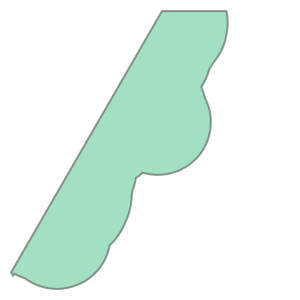

In [ ]:
# test the
#grid_chch.iloc[10]['geometry']



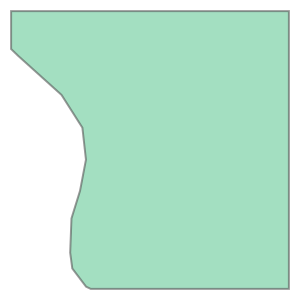

In [127]:
grid_1km_canterbury.iloc[10]['geometry']

In [ ]:
# read in the raster file by rioxarray
temp_path = '/content/drive/MyDrive/landSurfaceTemperature.tif'
temp_raster = rxr.open_rasterio(temp_path)


#

In [ ]:
# check the raster data after loading
temp_raster

<xarray.DataArray (band: 1, y: 1900, x: 2853)> Size: 22MB
[5420700 values with dtype=int32]
Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float64 23kB 172.4 172.4 172.4 172.4 ... 173.1 173.1 173.1
  * y            (y) float64 15kB -43.39 -43.39 -43.39 ... -43.9 -43.9 -43.9
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
    long_name:      cluster

In [ ]:
# install rasterstats
!pip install rasterstats -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.9/137.9 kB 2.7 MB/s eta 0:00:00


#check the raster and polygon are on the same crs

In [ ]:
#check the raster and polygon are on the same crs
print(temp_raster.rio.crs)
print(grid_chch.crs)

EPSG:4326
EPSG:2193


sinece the crs of raster is not same as ploygon, we need reporject raster images

reprojected_dataset = original_dataset.rio.reproject(destination_crs, resolution=..., resampling=..., ... )

In [ ]:
temp_nztm = temp_raster.rio.reproject(grid_chch.crs)
temp_nztm.rio.crs

CRS.from_epsg(2193)

In [ ]:
grid_chch.crs == temp_nztm.rio.crs

True

since we have new crs for raster, we can export the raster data to a new file.

In [ ]:
!pip install rioxarray -q
import rioxarray as rxr # Make sure 'rioxarray' is imported as 'rxr'

temp_nztm.rio.to_raster('/content/drive/MyDrive/landSurfaceTemperature_nztm.tif') # Call the function as a method of the 'rio' object

In [ ]:
# reading the new raster
temp_raster_nztm = rxr.open_rasterio('/content/drive/MyDrive/landSurfaceTemperature_nztm.tif')

In [ ]:
import rasterio
temp_ra1 = rasterio.open('/content/drive/MyDrive/landSurfaceTemperature_nztm.tif')

In [ ]:
arr = temp_ra1.read(1)

AttributeError: 'numpy.ndarray' object has no attribute 'plot'

In [ ]:
affine = temp_ra1.transform

In [ ]:
stats = zonal_stats(grid_chch, arr, affine=affine,nodata=-999,all_touched=True)

In [ ]:
stats

[{'min': 0.0, 'max': 14.0, 'mean': 5.4715798356472645, 'count': 49771},
 {'min': 0.0, 'max': 14.0, 'mean': 6.599153509606239, 'count': 63084},
 {'min': 0.0, 'max': 14.0, 'mean': 7.487859299120619, 'count': 144761},
 {'min': 0.0, 'max': 14.0, 'mean': 4.6921742373266095, 'count': 123349},
 {'min': 0.0, 'max': 14.0, 'mean': 7.171589690364989, 'count': 144525},
 {'min': 0.0, 'max': 13.0, 'mean': 1.5604766819930562, 'count': 31971},
 {'min': 0.0, 'max': 14.0, 'mean': 5.282819392072335, 'count': 99979},
 {'min': 0.0, 'max': 14.0, 'mean': 7.243331511247344, 'count': 144523},
 {'min': 0.0, 'max': 14.0, 'mean': 6.709781707654048, 'count': 144760},
 {'min': -2147483648.0,
  'max': 13.0,
  'mean': -38847702.69382976,
  'count': 29464},
 {'min': 0.0, 'max': 14.0, 'mean': 1.613765605595137, 'count': 15299},
 {'min': -2147483648.0,
  'max': 14.0,
  'mean': -27558275.931166228,
  'count': 143694},
 {'min': 0.0, 'max': 14.0, 'mean': 7.50044901906604, 'count': 144760},
 {'min': -2147483648.0,
  'max': 

In [ ]:
stats[1].get('mean')

6.6289817860868165

In [ ]:
stats[0].get('min')

0.0

In [ ]:
stats[0].get('max')

14.0

In [ ]:
stats[0].get('median')

In [ ]:
grid_chch.head(3)

id          left           top         right        bottom  \
139  140  1.570784e+06  5.148767e+06  1.582331e+06  5.138767e+06   
119  120  1.553464e+06  5.148767e+06  1.565011e+06  5.138767e+06   
149  150  1.579444e+06  5.153767e+06  1.590991e+06  5.143767e+06   

                                              geometry  
139  POLYGON ((1573670.936 5148766.897, 1579444.439...  
119  POLYGON ((1556350.428 5148766.897, 1562123.931...  
149  POLYGON ((1582331.190 5153766.897, 1588104.693...

We often want to store the resulting zonal statistics as new attributes in the GeoDataFrame, so that we do not need to calculate it again and also to display the values by geographic unit. Now we will calculate the mean ndvi for each sa1. Here we will also use the tqdm library as an optional. The tqdm library adds a progress bar to the loop iteration, providing a visual indication of the loop’s progress. You can use it for any loop.

Some details on the syntax you see in the code below:

for index, row: This is the loop’s syntax for iterating through the rows of a DataFrame. Here’s what each part means:

- index: This variable will hold the index of the current row being iterated.
- row: This variable will hold the actual data of the current row being iterated. It represents a single row of the GeoDataFrame, containing all the columns and their corresponding values for that specific row.

In [ ]:
# Import the tqdm library to monitor progress during the loop iteration.
from tqdm import tqdm

# Create a new column 'ndvi_mean' in the geospatial DataFrame 'sa1' to store calculated statistics.
grid_chch["temp_mean"] = None

# Iterate through each geometry in the geospatial DataFrame 'sa1' and calculate ndvi mean.
# tqdm () is measuring the loop progress
for index, row in tqdm(grid_chch.iterrows()):
    # Calculate zonal statistics (mean ndvi) for the current geometry.
    stats = zonal_stats(row['geometry'], arr, affine=affine,nodata=-999)

    # Store the calculated mean NDVI value in the 'ndvi_mean' column of the current row being iterated.
    grid_chch.loc[index, "temp_mean"] = stats[0].get('mean')

34it [00:00, 173.17it/s]


In [ ]:
grid_chch

id          left           top         right        bottom  \
139  140  1.570784e+06  5.148767e+06  1.582331e+06  5.138767e+06   
119  120  1.553464e+06  5.148767e+06  1.565011e+06  5.138767e+06   
149  150  1.579444e+06  5.153767e+06  1.590991e+06  5.143767e+06   
129  130  1.562124e+06  5.153767e+06  1.573671e+06  5.143767e+06   
138  139  1.570784e+06  5.158767e+06  1.582331e+06  5.148767e+06   
118  119  1.553464e+06  5.158767e+06  1.565011e+06  5.148767e+06   
128  129  1.562124e+06  5.163767e+06  1.573671e+06  5.153767e+06   
148  149  1.579444e+06  5.163767e+06  1.590991e+06  5.153767e+06   
137  138  1.570784e+06  5.168767e+06  1.582331e+06  5.158767e+06   
109  110  1.544803e+06  5.153767e+06  1.556350e+06  5.143767e+06   
179  180  1.605425e+06  5.148767e+06  1.616972e+06  5.138767e+06   
159  160  1.588105e+06  5.148767e+06  1.599652e+06  5.138767e+06   
169  170  1.596765e+06  5.153767e+06  1.608312e+06  5.143767e+06   
178  179  1.605425e+06  5.158767e+06  1.616972e+06  5.148767e+06   
158  159  1.588105e+06  5.158767e+06  1.599652e+06  5.148767e+06   
168  169  1.596765e+06  5.163767e+06  1.608312e+06  5.153767e+06   
177  178  1.605425e+06  5.168767e+06  1.616972e+06  5.158767e+06   
157  158  1.588105e+06  5.168767e+06  1.599652e+06  5.158767e+06   
167  168  1.596765e+06  5.173767e+06  1.608312e+06  5.163767e+06   
156  157  1.588105e+06  5.178767e+06  1.599652e+06  5.168767e+06   
106  107  1.544803e+06  5.183767e+06  1.556350e+06  5.173767e+06   
105  106  1.544803e+06  5.193767e+06  1.556350e+06  5.183767e+06   
147  148  1.579444e+06  5.173767e+06  1.590991e+06  5.163767e+06   
127  128  1.562124e+06  5.173767e+06  1.573671e+06  5.163767e+06   
136  137  1.570784e+06  5.178767e+06  1.582331e+06  5.168767e+06   
116  117  1.553464e+06  5.178767e+06  1.565011e+06  5.168767e+06   
126  127  1.562124e+06  5.183767e+06  1.573671e+06  5.173767e+06   
135  136  1.570784e+06  5.188767e+06  1.582331e+06  5.178767e+06   
115  116  1.553464e+06  5.188767e+06  1.565011e+06  5.178767e+06   
125  126  1.562124e+06  5.193767e+06  1.573671e+06  5.183767e+06   
114  115  1.553464e+06  5.198767e+06  1.565011e+06  5.188767e+06   
146  147  1.579444e+06  5.183767e+06  1.590991e+06  5.173767e+06   
134  135  1.570784e+06  5.198767e+06  1.582331e+06  5.188767e+06   
124  125  1.562124e+06  5.203767e+06  1.573671e+06  5.193767e+06   

                                              geometry        temp_mean  
139  POLYGON ((1573670.936 5148766.897, 1579444.439...         5.480683  
119  POLYGON ((1556350.428 5148766.897, 1562123.931...         6.628982  
149  POLYGON ((1582331.190 5153766.897, 1588104.693...         7.487587  
129  POLYGON ((1565010.682 5153766.897, 1570784.185...         4.705994  
138  POLYGON ((1573670.936 5158766.897, 1579444.439...         7.173809  
118  POLYGON ((1565010.682 5153766.897, 1562123.931...         1.579494  
128  POLYGON ((1570784.185 5163766.897, 1573670.936...         5.290884  
148  POLYGON ((1582331.190 5163766.897, 1588104.693...         7.242544  
137  POLYGON ((1573670.936 5168766.897, 1579444.439...         6.708297  
109  POLYGON ((1556350.428 5148766.897, 1553463.677... -37552275.605128  
179  POLYGON ((1608311.952 5148766.897, 1609545.874...         1.575145  
159  POLYGON ((1590991.444 5148766.897, 1596764.947... -26848239.339401  
169  POLYGON ((1599651.698 5153766.897, 1605425.201...         7.504177  
178  POLYGON ((1608311.952 5158766.897, 1610479.932... -27785737.416714  
158  POLYGON ((1590991.444 5158766.897, 1596764.947...         6.456005  
168  POLYGON ((1599651.698 5163766.897, 1605425.201...         7.129894  
177  POLYGON ((1606253.512 5165201.574, 1606262.537...         4.612426  
157  POLYGON ((1590991.444 5168766.897, 1596764.947...         7.478496  
167  POLYGON ((1597276.351 5169652.675, 1597344.813...         4.864209  
156  POLYGON ((1596764.947 5168766.897, 1590991.444...         3.648759  
106  POLYGON ((1553463.677 5183766.897, 1556350.428...         2.907667

In [ ]:
grid_chch[grid_chch['temp_mean'] <= 0]

id          left           top         right        bottom  \
109  110  1.544803e+06  5.153767e+06  1.556350e+06  5.143767e+06   
159  160  1.588105e+06  5.148767e+06  1.599652e+06  5.138767e+06   
178  179  1.605425e+06  5.158767e+06  1.616972e+06  5.148767e+06   
134  135  1.570784e+06  5.198767e+06  1.582331e+06  5.188767e+06   
124  125  1.562124e+06  5.203767e+06  1.573671e+06  5.193767e+06   

                                              geometry        temp_mean  
109  POLYGON ((1556350.428 5148766.897, 1553463.677... -37552275.605128  
159  POLYGON ((1590991.444 5148766.897, 1596764.947... -26848239.339401  
178  POLYGON ((1608311.952 5158766.897, 1610479.932... -27785737.416714  
134  POLYGON ((1570844.874 5193872.014, 1570857.770...  -12138279.15661  
124  POLYGON ((1570784.185 5193766.897, 1570632.871...              0.0

there are some of extrem data appear in the temp_mean. in this case, just set them to nodata=-999

In [ ]:
# set the value from 'temp_mean' < 0 to None
grid_chch.loc[grid_chch['temp_mean'] <= 0, 'temp_mean'] = None
grid_chch

id          left           top         right        bottom  \
139  140  1.570784e+06  5.148767e+06  1.582331e+06  5.138767e+06   
119  120  1.553464e+06  5.148767e+06  1.565011e+06  5.138767e+06   
149  150  1.579444e+06  5.153767e+06  1.590991e+06  5.143767e+06   
129  130  1.562124e+06  5.153767e+06  1.573671e+06  5.143767e+06   
138  139  1.570784e+06  5.158767e+06  1.582331e+06  5.148767e+06   
118  119  1.553464e+06  5.158767e+06  1.565011e+06  5.148767e+06   
128  129  1.562124e+06  5.163767e+06  1.573671e+06  5.153767e+06   
148  149  1.579444e+06  5.163767e+06  1.590991e+06  5.153767e+06   
137  138  1.570784e+06  5.168767e+06  1.582331e+06  5.158767e+06   
109  110  1.544803e+06  5.153767e+06  1.556350e+06  5.143767e+06   
179  180  1.605425e+06  5.148767e+06  1.616972e+06  5.138767e+06   
159  160  1.588105e+06  5.148767e+06  1.599652e+06  5.138767e+06   
169  170  1.596765e+06  5.153767e+06  1.608312e+06  5.143767e+06   
178  179  1.605425e+06  5.158767e+06  1.616972e+06  5.148767e+06   
158  159  1.588105e+06  5.158767e+06  1.599652e+06  5.148767e+06   
168  169  1.596765e+06  5.163767e+06  1.608312e+06  5.153767e+06   
177  178  1.605425e+06  5.168767e+06  1.616972e+06  5.158767e+06   
157  158  1.588105e+06  5.168767e+06  1.599652e+06  5.158767e+06   
167  168  1.596765e+06  5.173767e+06  1.608312e+06  5.163767e+06   
156  157  1.588105e+06  5.178767e+06  1.599652e+06  5.168767e+06   
106  107  1.544803e+06  5.183767e+06  1.556350e+06  5.173767e+06   
105  106  1.544803e+06  5.193767e+06  1.556350e+06  5.183767e+06   
147  148  1.579444e+06  5.173767e+06  1.590991e+06  5.163767e+06   
127  128  1.562124e+06  5.173767e+06  1.573671e+06  5.163767e+06   
136  137  1.570784e+06  5.178767e+06  1.582331e+06  5.168767e+06   
116  117  1.553464e+06  5.178767e+06  1.565011e+06  5.168767e+06   
126  127  1.562124e+06  5.183767e+06  1.573671e+06  5.173767e+06   
135  136  1.570784e+06  5.188767e+06  1.582331e+06  5.178767e+06   
115  116  1.553464e+06  5.188767e+06  1.565011e+06  5.178767e+06   
125  126  1.562124e+06  5.193767e+06  1.573671e+06  5.183767e+06   
114  115  1.553464e+06  5.198767e+06  1.565011e+06  5.188767e+06   
146  147  1.579444e+06  5.183767e+06  1.590991e+06  5.173767e+06   
134  135  1.570784e+06  5.198767e+06  1.582331e+06  5.188767e+06   
124  125  1.562124e+06  5.203767e+06  1.573671e+06  5.193767e+06   

                                              geometry temp_mean  
139  POLYGON ((1573670.936 5148766.897, 1579444.439...  5.480683  
119  POLYGON ((1556350.428 5148766.897, 1562123.931...  6.628982  
149  POLYGON ((1582331.190 5153766.897, 1588104.693...  7.487587  
129  POLYGON ((1565010.682 5153766.897, 1570784.185...  4.705994  
138  POLYGON ((1573670.936 5158766.897, 1579444.439...  7.173809  
118  POLYGON ((1565010.682 5153766.897, 1562123.931...  1.579494  
128  POLYGON ((1570784.185 5163766.897, 1573670.936...  5.290884  
148  POLYGON ((1582331.190 5163766.897, 1588104.693...  7.242544  
137  POLYGON ((1573670.936 5168766.897, 1579444.439...  6.708297  
109  POLYGON ((1556350.428 5148766.897, 1553463.677...      None  
179  POLYGON ((1608311.952 5148766.897, 1609545.874...  1.575145  
159  POLYGON ((1590991.444 5148766.897, 1596764.947...      None  
169  POLYGON ((1599651.698 5153766.897, 1605425.201...  7.504177  
178  POLYGON ((1608311.952 5158766.897, 1610479.932...      None  
158  POLYGON ((1590991.444 5158766.897, 1596764.947...  6.456005  
168  POLYGON ((1599651.698 5163766.897, 1605425.201...  7.129894  
177  POLYGON ((1606253.512 5165201.574, 1606262.537...  4.612426  
157  POLYGON ((1590991.444 5168766.897, 1596764.947...  7.478496  
167  POLYGON ((1597276.351 5169652.675, 1597344.813...  4.864209  
156  POLYGON ((1596764.947 5168766.897, 1590991.444...  3.648759  
106  POLYGON ((1553463.677 5183766.897, 1556350.428...  2.907667  
105  POLYGON ((1556350.428 5188766.897, 1553463.677...  2.741252  
147  POLYGON ((1582331.190 5173766.897, 1585940.915...  7.688748  
127  POLYGON ((15

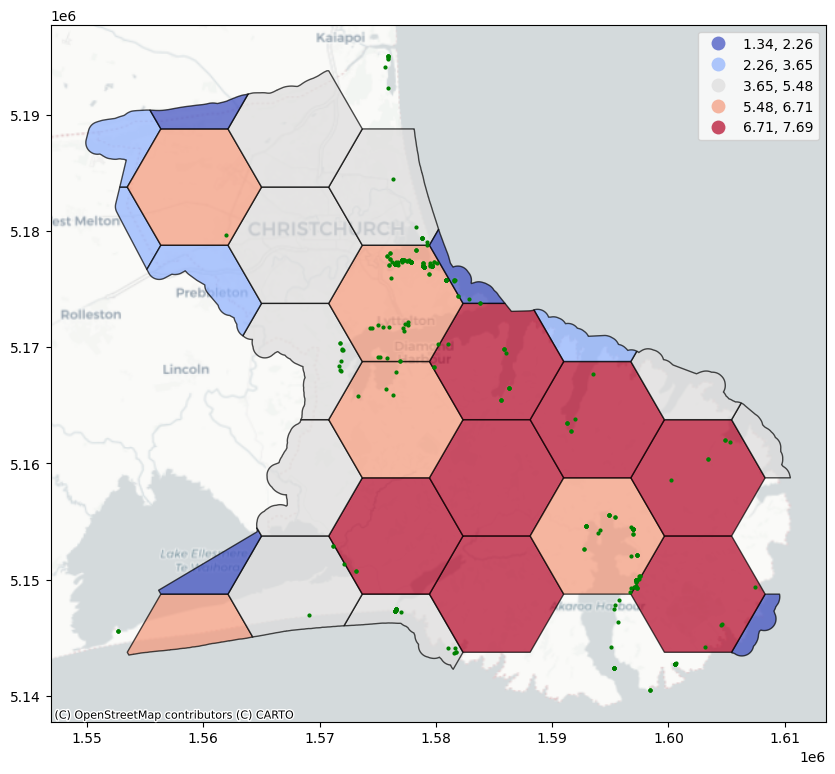

In [ ]:
#!pip install mapclassify
#Import the mapclassify library
import mapclassify

# Create a new figure and axis for plotting
# Set the figure size to 10x10 inches
fig, ax = plt.subplots(figsize=(10, 10))
grid_chch.plot(ax=ax, column="temp_mean", legend=True,scheme="NaturalBreaks",edgecolor='black',cmap='coolwarm',alpha=0.7)
oyster_chch.plot(ax=ax, color='green',markersize = 4)
cx.add_basemap(ax, source=cx.providers.CartoDB.Positron, crs=2193)
# Display the plot
plt.show()

In [ ]:
oyster_chch

COMMON NAM           SCIENTIFIC OBSERVATIO       STATE  \
4481  Variable Oystercatcher  Haematopus unicolor          1  Canterbury   
4500  Variable Oystercatcher  Haematopus unicolor          1  Canterbury   
4517  Variable Oystercatcher  Haematopus unicolor          1  Canterbury   
4499  Variable Oystercatcher  Haematopus unicolor          1  Canterbury   
4526  Variable Oystercatcher  Haematopus unicolor          7  Canterbury   
...                      ...                  ...        ...         ...   
4261  Variable Oystercatcher  Haematopus unicolor          4  Canterbury   
4259  Variable Oystercatcher  Haematopus unicolor          1  Canterbury   
4586  Variable Oystercatcher  Haematopus unicolor          1  Canterbury   
4280  Variable Oystercatcher  Haematopus unicolor          4  Canterbury   
4345  Variable Oystercatcher  Haematopus unicolor         22  Canterbury   

     STATE CODE             COUNTY  COUNTY COD   LATITUDE   LONGITUDE  \
4481     NZ-CAN  Christchurch City  NZ-CAN-060 -43.840900  172.411100   
4500     NZ-CAN  Christchurch City  NZ-CAN-060 -43.840900  172.411100   
4517     NZ-CAN  Christchurch City  NZ-CAN-060 -43.840900  172.411100   
4499     NZ-CAN  Christchurch City  NZ-CAN-060 -43.829589  172.615551   
4526     NZ-CAN  Christchurch City  NZ-CAN-060 -43.796009  172.666105   
...         ...                ...         ...        ...         ...   
4261     NZ-CAN  Christchurch City  NZ-CAN-060 -43.709567  173.041651   
4259     NZ-CAN  Christchurch City  NZ-CAN-060 -43.709567  173.041651   
4586     NZ-CAN  Christchurch City  NZ-CAN-060 -43.696043  173.065104   
4280     NZ-CAN  Christchurch City  NZ-CAN-060 -43.694625  173.060288   
4345     NZ-CAN  Christchurch City  NZ-CAN-060 -43.694625  173.060288   

      OBSERVAT_1                         geometry  
4481  2023-08-23  POINT (1552659.447 5145629.280)  
4500  2023-08-23  POINT (1552659.447 5145629.280)  
4517  2023-09-16  POINT (1552659.447 5145629.280)  
4499  2023-08-13  POINT (1569089.050 5146982.233)  
4526  2023-09-23  POINT (1573138.711 5150729.415)  
...          ...                              ...  
4261  2023-01-21  POINT (1603355.578 5160383.247)  
4259  2023-01-19  POINT (1603355.578 5160383.247)  
4586  2023-11-18  POINT (1605246.229 5161884.033)  
4280  2023-01-18  POINT (1604858.291 5162041.846)  
4345  2023-03-05  POINT (1604858.291 5162041.846)  

[420 rows x 11 columns]

In [ ]:
oyster_temp = gpd.sjoin(grid_chch, oyster_chch,predicate = 'contains')

In [ ]:
oyster_temp.head()

id          left           top         right        bottom  \
139  140  1.570784e+06  5.148767e+06  1.582331e+06  5.138767e+06   
139  140  1.570784e+06  5.148767e+06  1.582331e+06  5.138767e+06   
139  140  1.570784e+06  5.148767e+06  1.582331e+06  5.138767e+06   
139  140  1.570784e+06  5.148767e+06  1.582331e+06  5.138767e+06   
139  140  1.570784e+06  5.148767e+06  1.582331e+06  5.138767e+06   

                                              geometry temp_mean  index_right  \
139  POLYGON ((1573670.936 5148766.897, 1579444.439...  5.480683         4551   
139  POLYGON ((1573670.936 5148766.897, 1579444.439...  5.480683         4411   
139  POLYGON ((1573670.936 5148766.897, 1579444.439...  5.480683         4395   
139  POLYGON ((1573670.936 5148766.897, 1579444.439...  5.480683         4546   
139  POLYGON ((1573670.936 5148766.897, 1579444.439...  5.480683         4344   

                 COMMON NAM           SCIENTIFIC OBSERVATIO       STATE  \
139  Variable Oystercatcher  Haematopus unicolor          2  Canterbury   
139  Variable Oystercatcher  Haematopus unicolor          1  Canterbury   
139  Variable Oystercatcher  Haematopus unicolor          2  Canterbury   
139  Variable Oystercatcher  Haematopus unicolor          2  Canterbury   
139  Variable Oystercatcher  Haematopus unicolor          2  Canterbury   

    STATE CODE             COUNTY  COUNTY COD   LATITUDE   LONGITUDE  \
139     NZ-CAN  Christchurch City  NZ-CAN-060 -43.859149  172.770490   
139     NZ-CAN  Christchurch City  NZ-CAN-060 -43.858563  172.773038   
139     NZ-CAN  Christchurch City  NZ-CAN-060 -43.858563  172.773038   
139     NZ-CAN  Christchurch City  NZ-CAN-060 -43.855817  172.764141   
139     NZ-CAN  Christchurch City  NZ-CAN-060 -43.855378  172.771490   

     OBSERVAT_1  
139  2023-10-08  
139  2023-05-03  
139  2023-05-18  
139  2023-10-19  
139  2023-03-27

In [ ]:
oyster_temp = oyster_temp[['geometry','temp_mean','COMMON NAM','OBSERVATIO','OBSERVAT_1']]


In [ ]:
oyster_temp.temp_mean.unique()

array([5.480682839173405, 4.705994314468697, 7.173809093562781,
       6.708296785152388, None, 7.50417687680998, 6.456005004170142,
       7.129893869153942, 7.478495746487894, 7.688748045921724,
       5.09993200458969, 6.169791912817447, 4.357159077014446,
       6.303449476139093, 1.3415723335756569], dtype=object)

In [ ]:
oyster_temp.dtypes

geometry      geometry
temp_mean       object
COMMON NAM      object
OBSERVATIO      object
OBSERVAT_1      object
dtype: object

In [ ]:
oyster_temp.OBSERVATIO.unique()

array([nan, '1', '12', '7', '2', '6', '3', '10', '4', '5', '15', '22',
       '14', '50', '8', '13', '20', '88', '30', '33', '16', '58', '66',
       '44', '120', '55', '100', '48', '74', '67', '69', '63', '150',
       '36', '27', '144', '125', '45', '37', '31', '75', '104', '35',
       '39', '40', '102', '11', '25', '64', '23', '60', '97', '9'],
      dtype=object)

In [ ]:
# change X to nan and set the cols to int64

import numpy as np
for index, row in oyster_temp.iterrows():
    if row['OBSERVATIO'] == 'X':
        oyster_temp.at[index, 'OBSERVATIO'] = np.nan

In [ ]:
oyster_temp.OBSERVATIO = oyster_temp.OBSERVATIO.astype('Int64')

In [ ]:
oyster_temp.temp_mean = oyster_temp.temp_mean.astype('float64')

In [ ]:
oyster_temp

geometry  temp_mean  \
139  POLYGON ((1573670.936 5148766.897, 1579444.439...   5.480683   
139  POLYGON ((1573670.936 5148766.897, 1579444.439...   5.480683   
139  POLYGON ((1573670.936 5148766.897, 1579444.439...   5.480683   
139  POLYGON ((1573670.936 5148766.897, 1579444.439...   5.480683   
139  POLYGON ((1573670.936 5148766.897, 1579444.439...   5.480683   
..                                                 ...        ...   
134  POLYGON ((1570844.874 5193872.014, 1570857.770...        NaN   
134  POLYGON ((1570844.874 5193872.014, 1570857.770...        NaN   
134  POLYGON ((1570844.874 5193872.014, 1570857.770...        NaN   
134  POLYGON ((1570844.874 5193872.014, 1570857.770...        NaN   
134  POLYGON ((1570844.874 5193872.014, 1570857.770...        NaN   

                 COMMON NAM  OBSERVATIO  OBSERVAT_1  
139  Variable Oystercatcher        <NA>  2023-10-08  
139  Variable Oystercatcher        <NA>  2023-05-03  
139  Variable Oystercatcher        <NA>  2023-05-18  
139  Variable Oystercatcher        <NA>  2023-10-19  
139  Variable Oystercatcher        <NA>  2023-03-27  
..                      ...         ...         ...  
134  Variable Oystercatcher           4  2023-09-24  
134  Variable Oystercatcher           1  2023-07-14  
134  Variable Oystercatcher           1  2023-10-14  
134  Variable Oystercatcher           1  2023-01-13  
134  Variable Oystercatcher           1  2023-03-07  

[406 rows x 5 columns]

In [ ]:
import pandas as pd
import geopandas as gpd

oyster_temp = gpd.GeoDataFrame(oyster_temp, geometry='geometry',crs='EPSG:2193')



KeyError: 'geometry'

In [ ]:
oyster_temp

geometry  temp_mean  \
139  POLYGON ((1573670.936 5148766.897, 1579444.439...   5.480683   
139  POLYGON ((1573670.936 5148766.897, 1579444.439...   5.480683   
139  POLYGON ((1573670.936 5148766.897, 1579444.439...   5.480683   
139  POLYGON ((1573670.936 5148766.897, 1579444.439...   5.480683   
139  POLYGON ((1573670.936 5148766.897, 1579444.439...   5.480683   
..                                                 ...        ...   
134  POLYGON ((1570844.874 5193872.014, 1570857.770...        NaN   
134  POLYGON ((1570844.874 5193872.014, 1570857.770...        NaN   
134  POLYGON ((1570844.874 5193872.014, 1570857.770...        NaN   
134  POLYGON ((1570844.874 5193872.014, 1570857.770...        NaN   
134  POLYGON ((1570844.874 5193872.014, 1570857.770...        NaN   

                 COMMON NAM  OBSERVATIO  OBSERVAT_1  
139  Variable Oystercatcher        <NA>  2023-10-08  
139  Variable Oystercatcher        <NA>  2023-05-03  
139  Variable Oystercatcher        <NA>  2023-05-18  
139  Variable Oystercatcher        <NA>  2023-10-19  
139  Variable Oystercatcher        <NA>  2023-03-27  
..                      ...         ...         ...  
134  Variable Oystercatcher           4  2023-09-24  
134  Variable Oystercatcher           1  2023-07-14  
134  Variable Oystercatcher           1  2023-10-14  
134  Variable Oystercatcher           1  2023-01-13  
134  Variable Oystercatcher           1  2023-03-07  

[406 rows x 5 columns]

In [ ]:
# 2. Group by polygon geometry and sum 'OBSERVATIO'
sum_by_polygon = oyster_temp.dissolve(by=oyster_temp.geometry, aggfunc={'OBSERVATIO': 'sum','temp_mean': 'first'})

# Print the result
print(sum_by_polygon)

                                                                                            geometry  \
geometry                                                                                               
POLYGON ((1556350.428 5148766.897, 1553463.677...  POLYGON ((1553463.677 5143766.897, 1547725.600...   
POLYGON ((1565010.682 5153766.897, 1570784.185...  POLYGON ((1573670.936 5148766.897, 1572098.880...   
POLYGON ((1573670.936 5148766.897, 1579444.439...  POLYGON ((1581369.696 5142450.741, 1581319.314...   
POLYGON ((1573670.936 5158766.897, 1579444.439...  POLYGON ((1579444.439 5158766.897, 1582331.190...   
POLYGON ((1573670.936 5168766.897, 1579444.439...  POLYGON ((1582331.190 5163766.897, 1579444.439...   
POLYGON ((1556350.428 5188766.897, 1562123.931...  POLYGON ((1556350.428 5188766.897, 1562123.931...   
POLYGON ((1570844.874 5193872.014, 1570857.770...  POLYGON ((1570873.740 5193889.983, 1570926.869...   
POLYGON ((1573670.936 5188766.897, 1578127.755...  POLYGON ((157

In [ ]:
print(sum_by_polygon.columns)

Index(['geometry', 'OBSERVATIO', 'temp_mean'], dtype='object')


In [ ]:
type(sum_by_polygon)

geopandas.geodataframe.GeoDataFrame

drop the index and reset it. in this case drop is essential

In [ ]:
sum_by_polygon = sum_by_polygon.reset_index(drop=True)

In [ ]:
sum_by_polygon

geometry  OBSERVATIO  temp_mean
0   POLYGON ((1553463.677 5143766.897, 1547725.600...           3        NaN
1   POLYGON ((1573670.936 5148766.897, 1572098.880...          15   4.705994
2   POLYGON ((1581369.696 5142450.741, 1581319.314...           0   5.480683
3   POLYGON ((1579444.439 5158766.897, 1582331.190...          14   7.173809
4   POLYGON ((1582331.190 5163766.897, 1579444.439...          16   6.708297
5   POLYGON ((1556350.428 5188766.897, 1562123.931...           2   6.303449
6   POLYGON ((1570873.740 5193889.983, 1570926.869...          15        NaN
7   POLYGON ((1578150.275 5188643.217, 1578172.823...          59   4.357159
8   POLYGON ((1570784.185 5163766.897, 1568397.350...           0   5.099932
9   POLYGON ((1579444.439 5178766.897, 1582331.190...        3720   6.169792
10  POLYGON ((1586028.561 5173657.609, 1586495.624...          31   7.688748
11  POLYGON ((1580269.004 5180035.635, 1580279.424...          12   1.341572
12  POLYGON ((1608311.952 5158766.897, 1605425.201...          34   7.129894
13  POLYGON ((1599651.698 5163766.897, 1596764.947...          19   7.478496
14  POLYGON ((1596794.711 5138818.449, 1596649.224...          55        NaN
15  POLYGON ((1590991.444 5158766.897, 1596764.947...           0   6.456005
16  POLYGON ((1605425.201 5143766.897, 1599651.698...          24   7.504177

# spatial autorelation analysis

In [ ]:
# Importing Libraries
!pip install pysal -q
!pip install esda -q
!pip install splot -q
import pandas as pd
import geopandas as gpd
import numpy as np
from pysal.lib import weights
from splot.libpysal import plot_spatial_weights
from esda.moran import Moran, Moran_Local
from splot.esda import moran_scatterplot, plot_local_autocorrelation, lisa_cluster
import matplotlib.pyplot as plt
import folium
import matplotlib.colors as colors


import warnings
warnings.filterwarnings("ignore")

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 42.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 45.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.9/47.9 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 347.3/347.3 kB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.0/59.0 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.3/141.3 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.9/53.9 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.1/243.1 kB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.1/

In [ ]:
# Fillna of pop_count and total_monthly_income
sum_by_polygon['temp_mean'].fillna(0, inplace=True)
sum_by_polygon['OBSERVATIO'].fillna(0, inplace=True)

In [ ]:
# Plotting choropleth map of pop_count column
sum_by_polygon.explore(
    tiles='cartodbpositron',
    column='temp_mean',
    height='60%',
    width='60%',
    scheme='naturalbreaks',
    cmap='Oranges',
    style_kwds={
        'stroke': True,
        'edgecolor': 'k',
        'linewidth': 0.03,
        'fillOpacity': 1
        },
    legend_kwds={
        'colorbar': False,
        'fmt': '{:.0f}'
        }
    )

In [ ]:
# Plotting choropleth map of pop_count column
sum_by_polygon.explore(
    tiles='cartodbpositron',
    column='OBSERVATIO',
    height='60%',
    width='60%',
    scheme='naturalbreaks',
    cmap='Oranges',
    style_kwds={
        'stroke': True,
        'edgecolor': 'k',
        'linewidth': 0.03,
        'fillOpacity': 1
        },
    legend_kwds={
        'colorbar': False,
        'fmt': '{:.0f}'
        }
    )

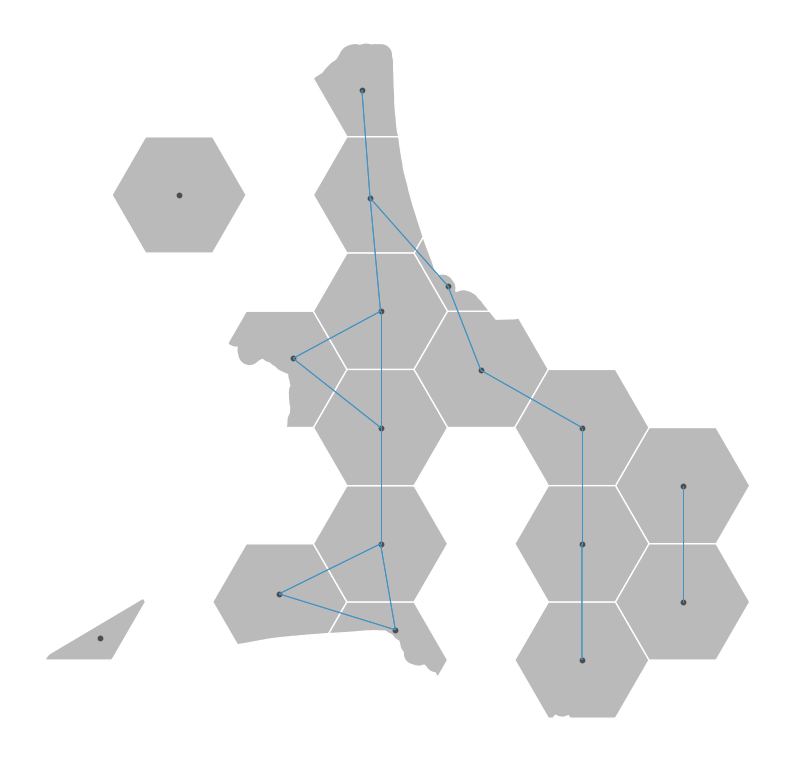

In [ ]:
# Building spatial weights object
w = weights.contiguity.Queen.from_dataframe(sum_by_polygon)

# Plotting to visualize spatial weights
plot_spatial_weights(w, sum_by_polygon);

In [ ]:
# Transforming weights into binary (if it's 1 = is neighbor, 0 = not neighbor)
w.transform = "B"

# Showing neighbors indexes
w.neighbors

{0: [],
 1: [2, 3],
 2: [1, 3],
 3: [1, 2, 4],
 4: [8, 9, 3],
 5: [],
 6: [7],
 7: [9, 11, 6],
 8: [9, 4],
 9: [8, 4, 7],
 10: [11, 13],
 11: [10, 7],
 12: [16],
 13: [10, 15],
 14: [15],
 15: [13, 14],
 16: [12]}

In [ ]:
w.weights

{0: [],
 1: [1.0, 1.0],
 2: [1.0, 1.0],
 3: [1.0, 1.0, 1.0],
 4: [1.0, 1.0, 1.0],
 5: [],
 6: [1.0],
 7: [1.0, 1.0, 1.0],
 8: [1.0, 1.0],
 9: [1.0, 1.0, 1.0],
 10: [1.0, 1.0],
 11: [1.0, 1.0],
 12: [1.0],
 13: [1.0, 1.0],
 14: [1.0],
 15: [1.0, 1.0],
 16: [1.0]}

In [ ]:
sum_by_polygon.dtypes

geometry       geometry
OBSERVATIO        Int64
temp_mean       float64
w_mean_temp     float64
dtype: object

In [ ]:
sum_by_polygon.OBSERVATIO.unique()

<IntegerArray>
[3, 15, 0, 14, 16, 2, 59, 3720, 31, 12, 34, 19, 55, 24]
Length: 14, dtype: Int64

In [ ]:
# convert OBSERVATIO to float64
sum_by_polygo = sum_by_polygon.OBSERVATIO.astype(float)

In [ ]:
import pandas as pd

# Check the unique values in OBSERVATIO to inspect if there are non-numeric values
print(sum_by_polygon['OBSERVATIO'].unique())

# Convert OBSERVATIO to numeric, forcing non-numeric values to NaN
sum_by_polygon['OBSERVATIO'] = pd.to_numeric(sum_by_polygon['OBSERVATIO'], errors='coerce')

# Print the unique values again to confirm successful conversion
print(sum_by_polygon['OBSERVATIO'].unique())

# Fill or drop NaN values, depending on your needs (for example, fill NaNs with 0)
sum_by_polygon['OBSERVATIO'] = sum_by_polygon['OBSERVATIO'].fillna(0)

# Ensure that the column is now float64
sum_by_polygon['OBSERVATIO'] = sum_by_polygon['OBSERVATIO'].astype(float)

# Apply the spatial lag operation
sum_by_polygon['w_mean_temp'] = weights.lag_spatial(w, sum_by_polygon['temp_mean'])
sum_by_polygon['w_OBSERVATIO'] = weights.lag_spatial(w, sum_by_polygon['OBSERVATIO'])

# Check the head of the dataframe
print(sum_by_polygon.head())



<IntegerArray>
[3, 15, 0, 14, 16, 2, 59, 3720, 31, 12, 34, 19, 55, 24]
Length: 14, dtype: Int64
<IntegerArray>
[3, 15, 0, 14, 16, 2, 59, 3720, 31, 12, 34, 19, 55, 24]
Length: 14, dtype: Int64
                                            geometry  OBSERVATIO  temp_mean  \
0  POLYGON ((1553463.677 5143766.897, 1547725.600...         3.0   0.000000   
1  POLYGON ((1573670.936 5148766.897, 1572098.880...        15.0   4.705994   
2  POLYGON ((1581369.696 5142450.741, 1581319.314...         0.0   5.480683   
3  POLYGON ((1579444.439 5158766.897, 1582331.190...        14.0   7.173809   
4  POLYGON ((1582331.190 5163766.897, 1579444.439...        16.0   6.708297   

   w_mean_temp  w_OBSERVATIO  
0     0.000000           0.0  
1    12.654492          14.0  
2    11.879803          29.0  
3    16.894974          31.0  
4    18.443533        3734.0  


In [ ]:
y_temp = sum_by_polygon['temp_mean']

moran = Moran(y_temp, w)
print(moran.I)

('WARNING: ', 0, ' is an island (no neighbors)')
('WARNING: ', 5, ' is an island (no neighbors)')
0.10156684274525878


-0.08952105113033529


In [ ]:
moran.p_sim

0.232

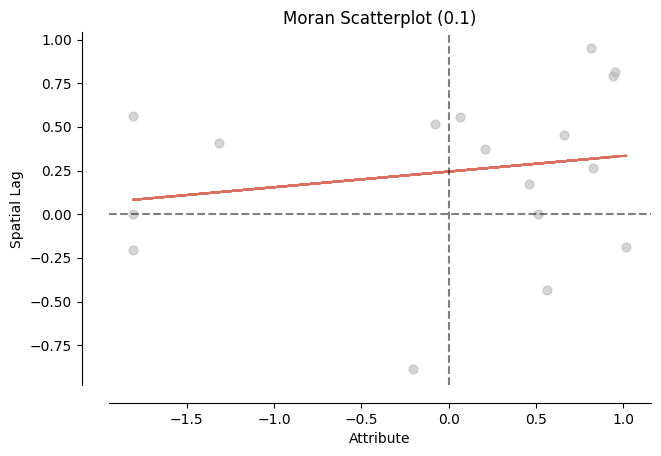

In [ ]:
# Plotting Moran's I scatter plot
moran_scatterplot(moran);

In [ ]:
y_ober = sum_by_polygon['OBSERVATIO']

moran_ober = Moran(y_ober, w)
print(moran_ober.I)

-0.08952105113033529


In [ ]:
moran_ober.p_sim

0.287

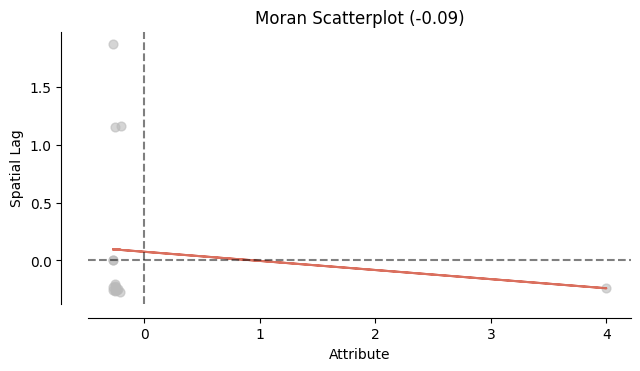

In [ ]:
moran_scatterplot(moran_ober);

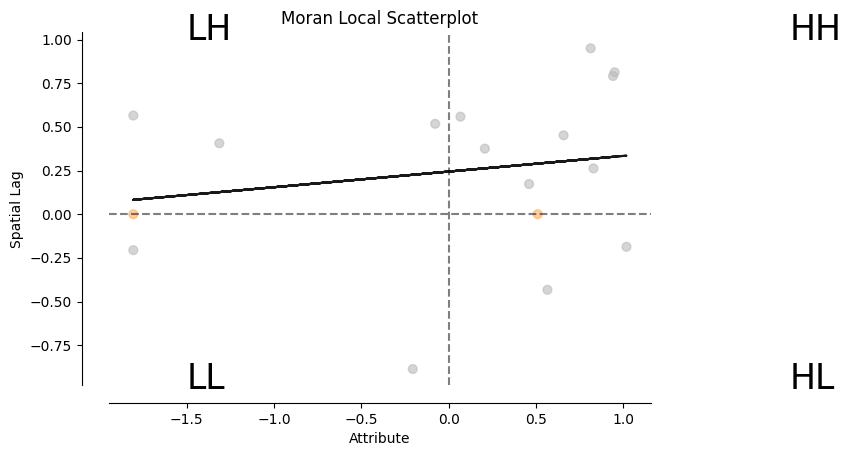

In [ ]:
# Local Moran's I
local_moran = Moran_Local(y_temp, w)

# Plotting Local Moran's I scatterplot of pop_count
fig, ax = moran_scatterplot(local_moran, p=0.05);

plt.text(1.95, 1, 'HH', fontsize=25)
plt.text(1.95, -1.0, 'HL', fontsize=25)
plt.text(-1.5, 1, 'LH', fontsize=25)
plt.text(-1.5, -1, 'LL', fontsize=25)
plt.show()

In [ ]:
# creating column with local_moran classification
sum_by_polygon['temp_local_moran'] = local_moran.q

# Dict to map local moran's classification codes
local_moran_classification = {1: 'HH', 2: 'LH', 3: 'LL', 4: 'HL'}

# Mapping local moran's classification codes
sum_by_polygon['temp_local_moran'] = sum_by_polygon['temp_local_moran'].map(local_moran_classification)

# p-value for each observation/neighbor pair
sum_by_polygon['temp_local_moran_p_sim'] = local_moran.p_sim

# If p-value > 0.05 it is not statistical significant
sum_by_polygon['temp_local_moran'] = np.where(sum_by_polygon['temp_local_moran_p_sim'] > 0.05, 'ns', sum_by_polygon['temp_local_moran'])

sum_by_polygon.head()

geometry  OBSERVATIO  temp_mean  \
0  POLYGON ((1553463.677 5143766.897, 1547725.600...         3.0   0.000000   
1  POLYGON ((1573670.936 5148766.897, 1572098.880...        15.0   4.705994   
2  POLYGON ((1581369.696 5142450.741, 1581319.314...         0.0   5.480683   
3  POLYGON ((1579444.439 5158766.897, 1582331.190...        14.0   7.173809   
4  POLYGON ((1582331.190 5163766.897, 1579444.439...        16.0   6.708297   

   w_mean_temp  w_OBSERVATIO temp_local_moran  temp_local_moran_p_sim  
0     0.000000           0.0               LL                   0.001  
1    12.654492          14.0               ns                   0.327  
2    11.879803          29.0               ns                   0.399  
3    16.894974          31.0               ns                   0.325  
4    18.443533        3734.0               ns                   0.251

In [ ]:
# Plotting Local Moran's I classification map of pop_count column
sum_by_polygon.explore(
    tiles='cartodbpositron',
    column='temp_local_moran',
    height='70%',
    width='70%',
    cmap=[
    '#D7191C', # Red
    '#FDAE61', # Orange
    '#ABD9E9', # Light Blue
    '#2C7BB6', # Blue
    '#D3D3D3'  # Grey
    ],
    style_kwds={
        'stroke': True,
        'edgecolor': 'k',
        'linewidth': 0.03,
        'fillOpacity': 1

        },
    )